## DATA MINING AND INSIGHT DISCOVERY ON HOUSING DATASET  IN INDONESIA

#### * data preprocessing and standardization.
##### * Checking data skewness and kurtosis
##### * Outlier detection and removal 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

path = 'D:\\FREELANCER\\DATAMINING AND INSIGHTHOUSE PRICES'
os.chdir(path)
hosue_df = pd.read_csv(os.path.join('DATASET', 'Al-Muzahmiyya.csv'))
hosue_df['last_updated'] = pd.to_datetime(hosue_df.last_updated)
hosue_df = hosue_df.iloc[:, 1:]
hosue_df = hosue_df.drop(['created_at', 'address'], axis = 1)
hosue_df.set_index('last_updated', inplace = True)
hosue_df.sort_values(by = 'last_updated', inplace = True)
#sort the data
print('See data descroiption: {}'.format(hosue_df.describe()))
print('Skew of data: {}'.format(hosue_df.skew()))
print('Kurt of data: {}'.format(hosue_df.kurt()))



See data descroiption:               price   meter_price          age          area        floor  \
count  6.397000e+03  6.397000e+03  6397.000000  6.397000e+03  6397.000000   
mean   9.277072e+08  3.373505e+05     0.672346  4.663239e+05     0.079569   
std    2.950779e+10  2.685000e+07     3.227298  2.692307e+07     0.398657   
min    3.000000e+00  0.000000e+00     0.000000  0.000000e+00     0.000000   
25%    7.000000e+04  0.000000e+00     0.000000  6.450000e+02     0.000000   
50%    2.000430e+05  2.500000e+01     0.000000  2.250000e+03     0.000000   
75%    7.000000e+05  1.200000e+02     0.000000  7.750000e+03     0.000000   
max    1.110000e+12  2.147480e+09    36.000000  2.150000e+09     4.000000   

              beds  living_room   apartments       stores        rooms  \
count  6397.000000  6397.000000  6397.000000  6397.000000  6397.000000   
mean      0.789120     0.403314     0.188526     0.044239     0.400969   
std       1.660174     0.886583     1.346401     0.601291    

##### Plot of unstandardized dataset

##### * Observe positive skewness in 
###### * age 
###### * area
###### * floor
###### * living room
###### * meter
###### * price
###### * rooms
###### *etc...


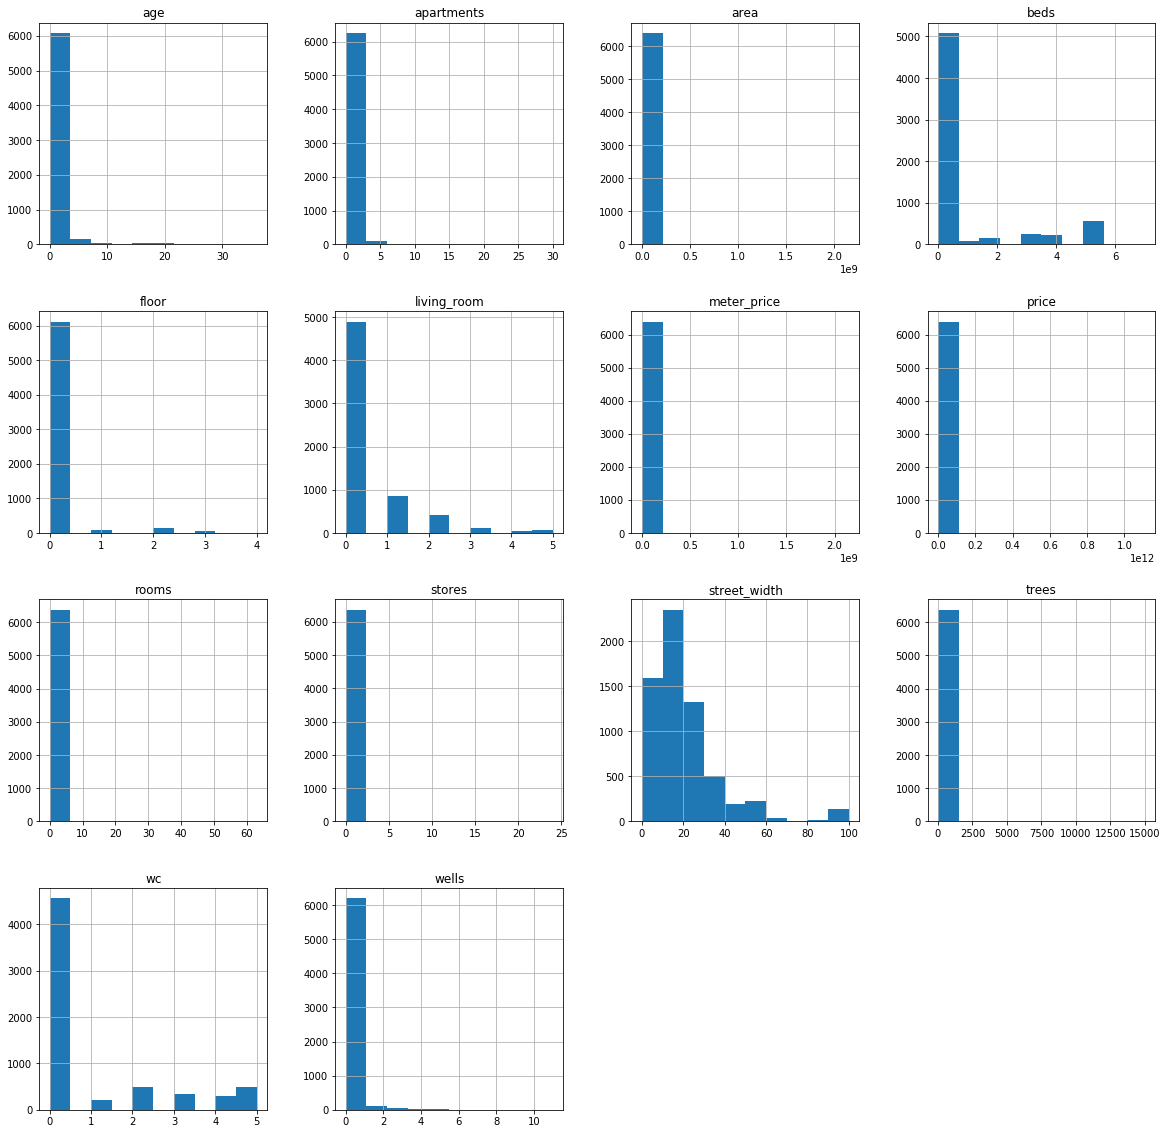

In [4]:
hosue_df.hist()
plt.show()

In [2]:
#standardize numeric dataset
def standardize_houseprize(df, standardize = None, 
                           logg = None, normalize = None):
  df = df.copy(deep = True)
  #drop all objects
  #and leaving all float64 and int64 datatypes
  for ii in hosue_df.columns:
    if hosue_df[ii].dtype == object:
      df = df.drop(ii, axis = 1)
  
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
  else:
    pass
    
  return df

df = standardize_houseprize(hosue_df)
df_standard = standardize_houseprize(hosue_df, standardize = True)
log_data = standardize_houseprize(hosue_df, logg=True)
df_normal = standardize_houseprize(hosue_df, normalize = True)

0 price
1 meter_price
2 age
3 area
4 floor
5 beds
6 living_room
7 apartments
8 stores
9 rooms
10 wells
11 trees
12 wc
13 street_width


C:\Users\kennedy\Anaconda3\envs\NeuralNet\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


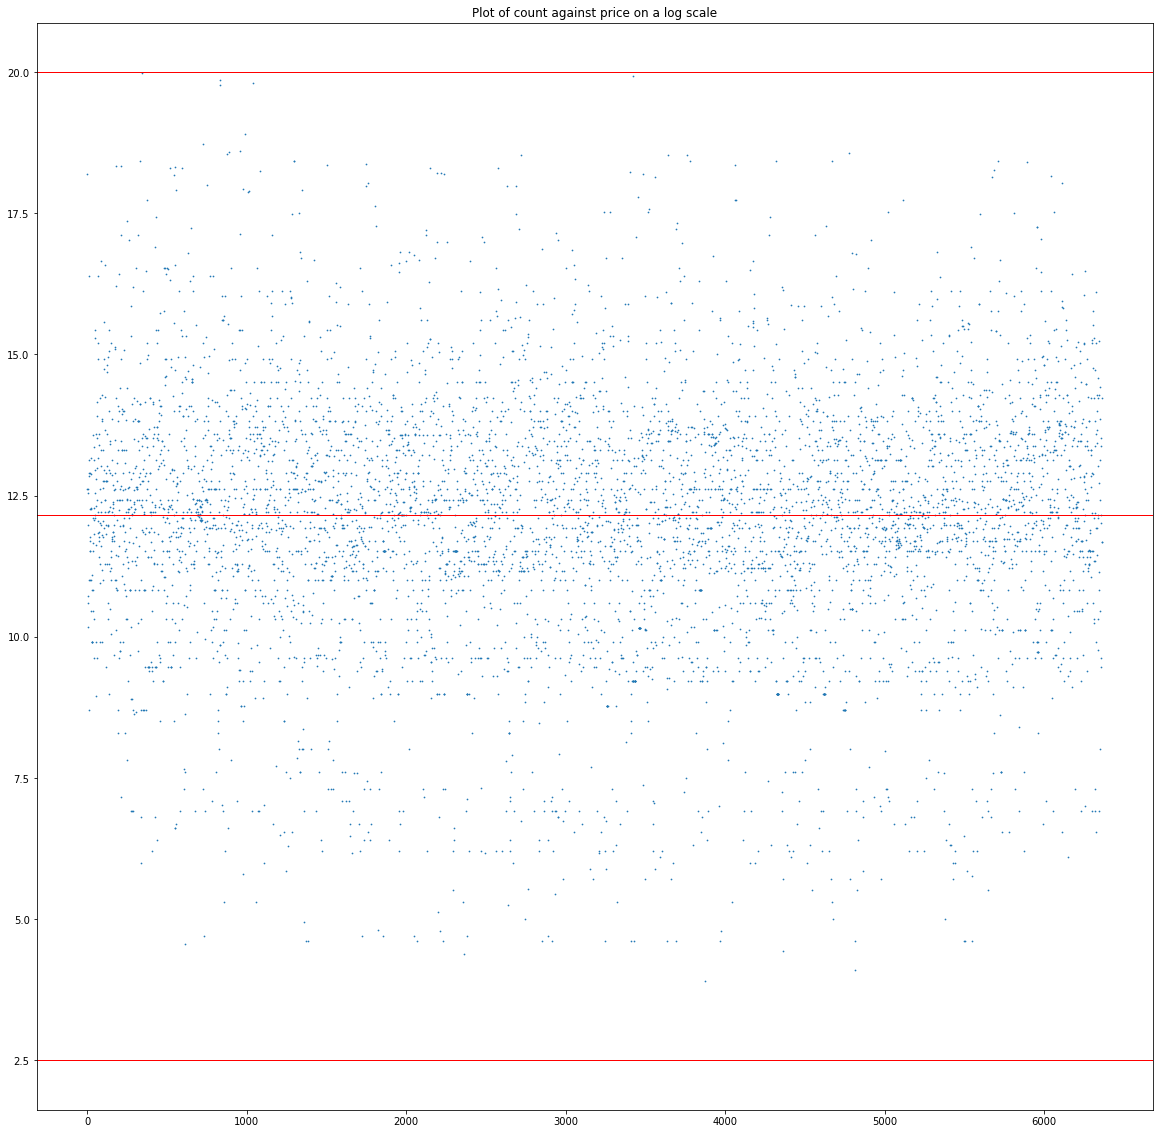

In [6]:
log_data.describe()
#remove outliers within a certain price scale
after_outl = log_data[(log_data.price < 20.0) & (log_data.price > 2.5)]
#plot log_price
plt.scatter(np.arange(after_outl.shape[0]), after_outl.price, s = .5)
plt.title('Plot of count against price on a log scale')
plt.axhline(y = 20, linewidth=1, color='r')
plt.axhline(y = 2.5, linewidth=1, color='r')
plt.axhline(y = 12.159753818376581, linewidth=1, color='r')


###### Work on all numeric columns after dropping object columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EC6F6D940>,
      dtype=object)

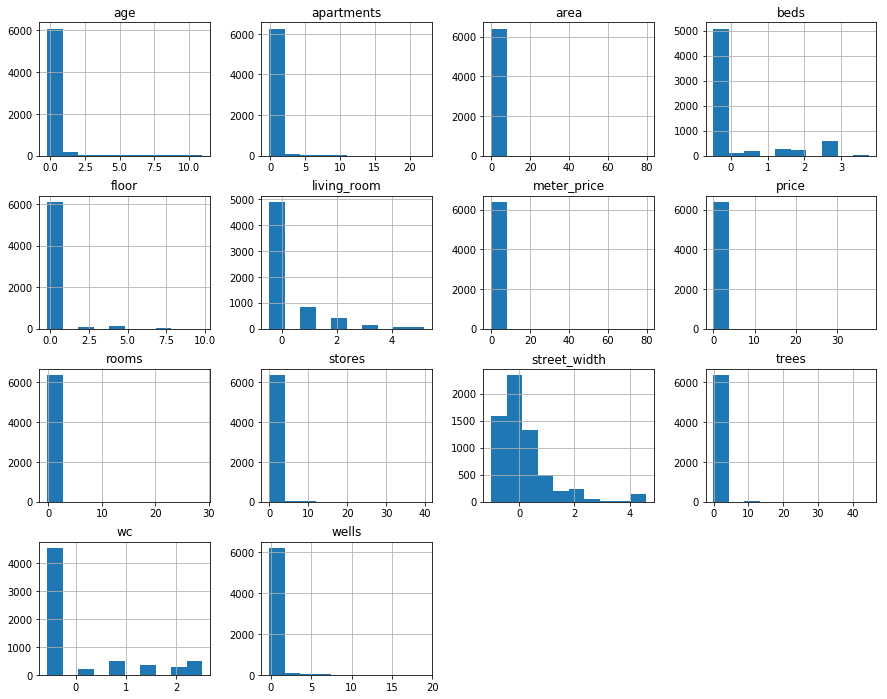

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
#histogram of standardized dataset
df_standard.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EC7B1C940>,
      dtype=object)

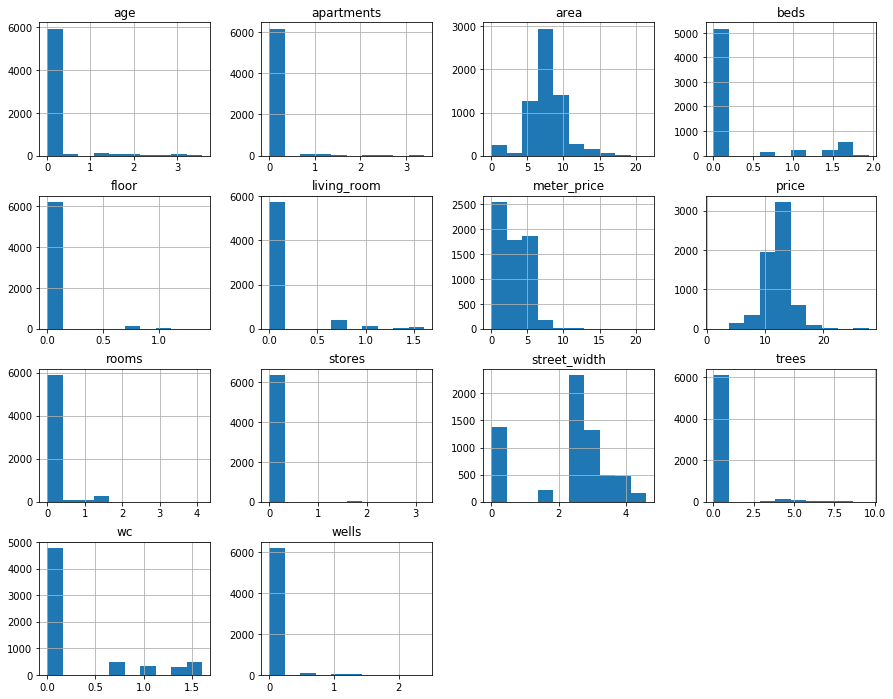

In [8]:
#hist of log data
log_data.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EC6F43860>,
      dtype=object)

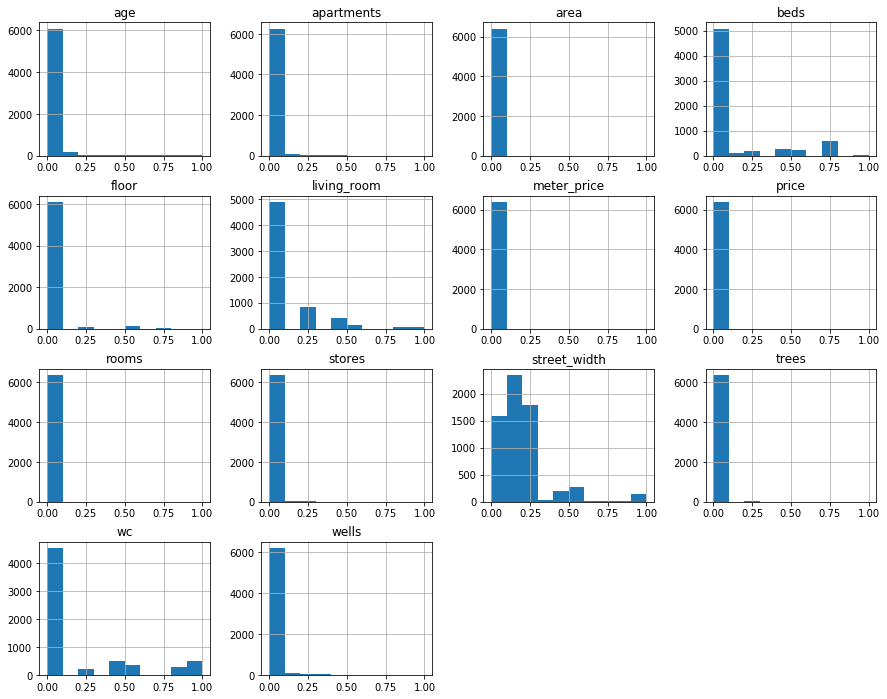

In [9]:
#histogram of normalized data
df_normal.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EC7E28080>,
      dtype=object)

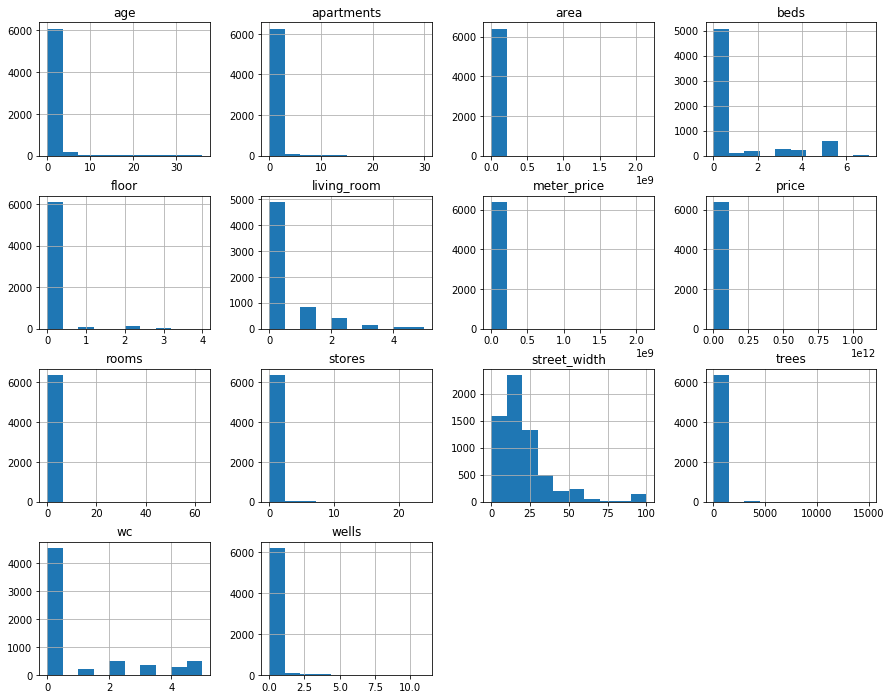

In [10]:
#hist of unscaled dataset
df.hist()

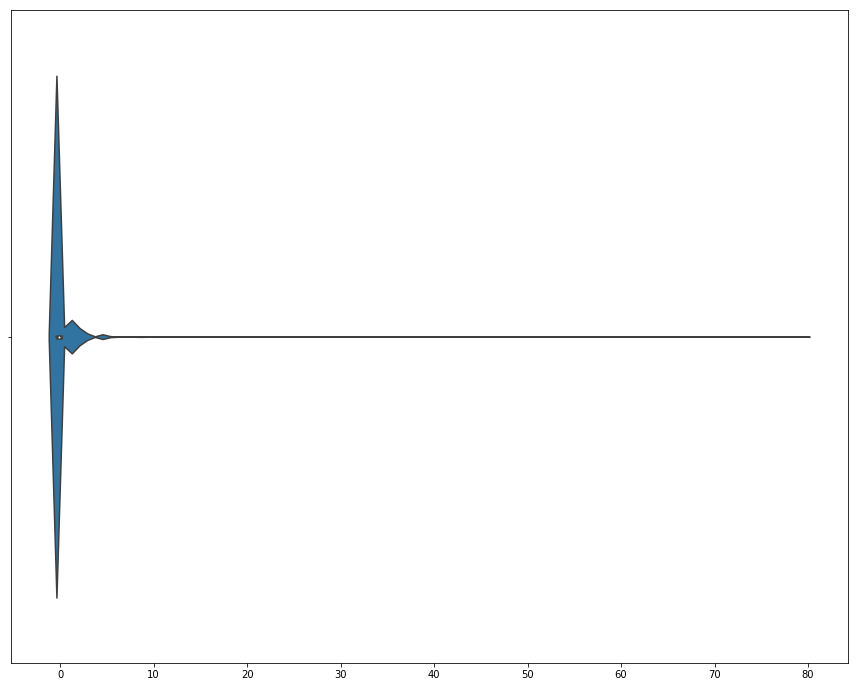

In [11]:
#violin plot of unscaled dataset
sns.violinplot(df_standard)

#### Pairplot shows the correlation distribution scatter plot amongst all features.

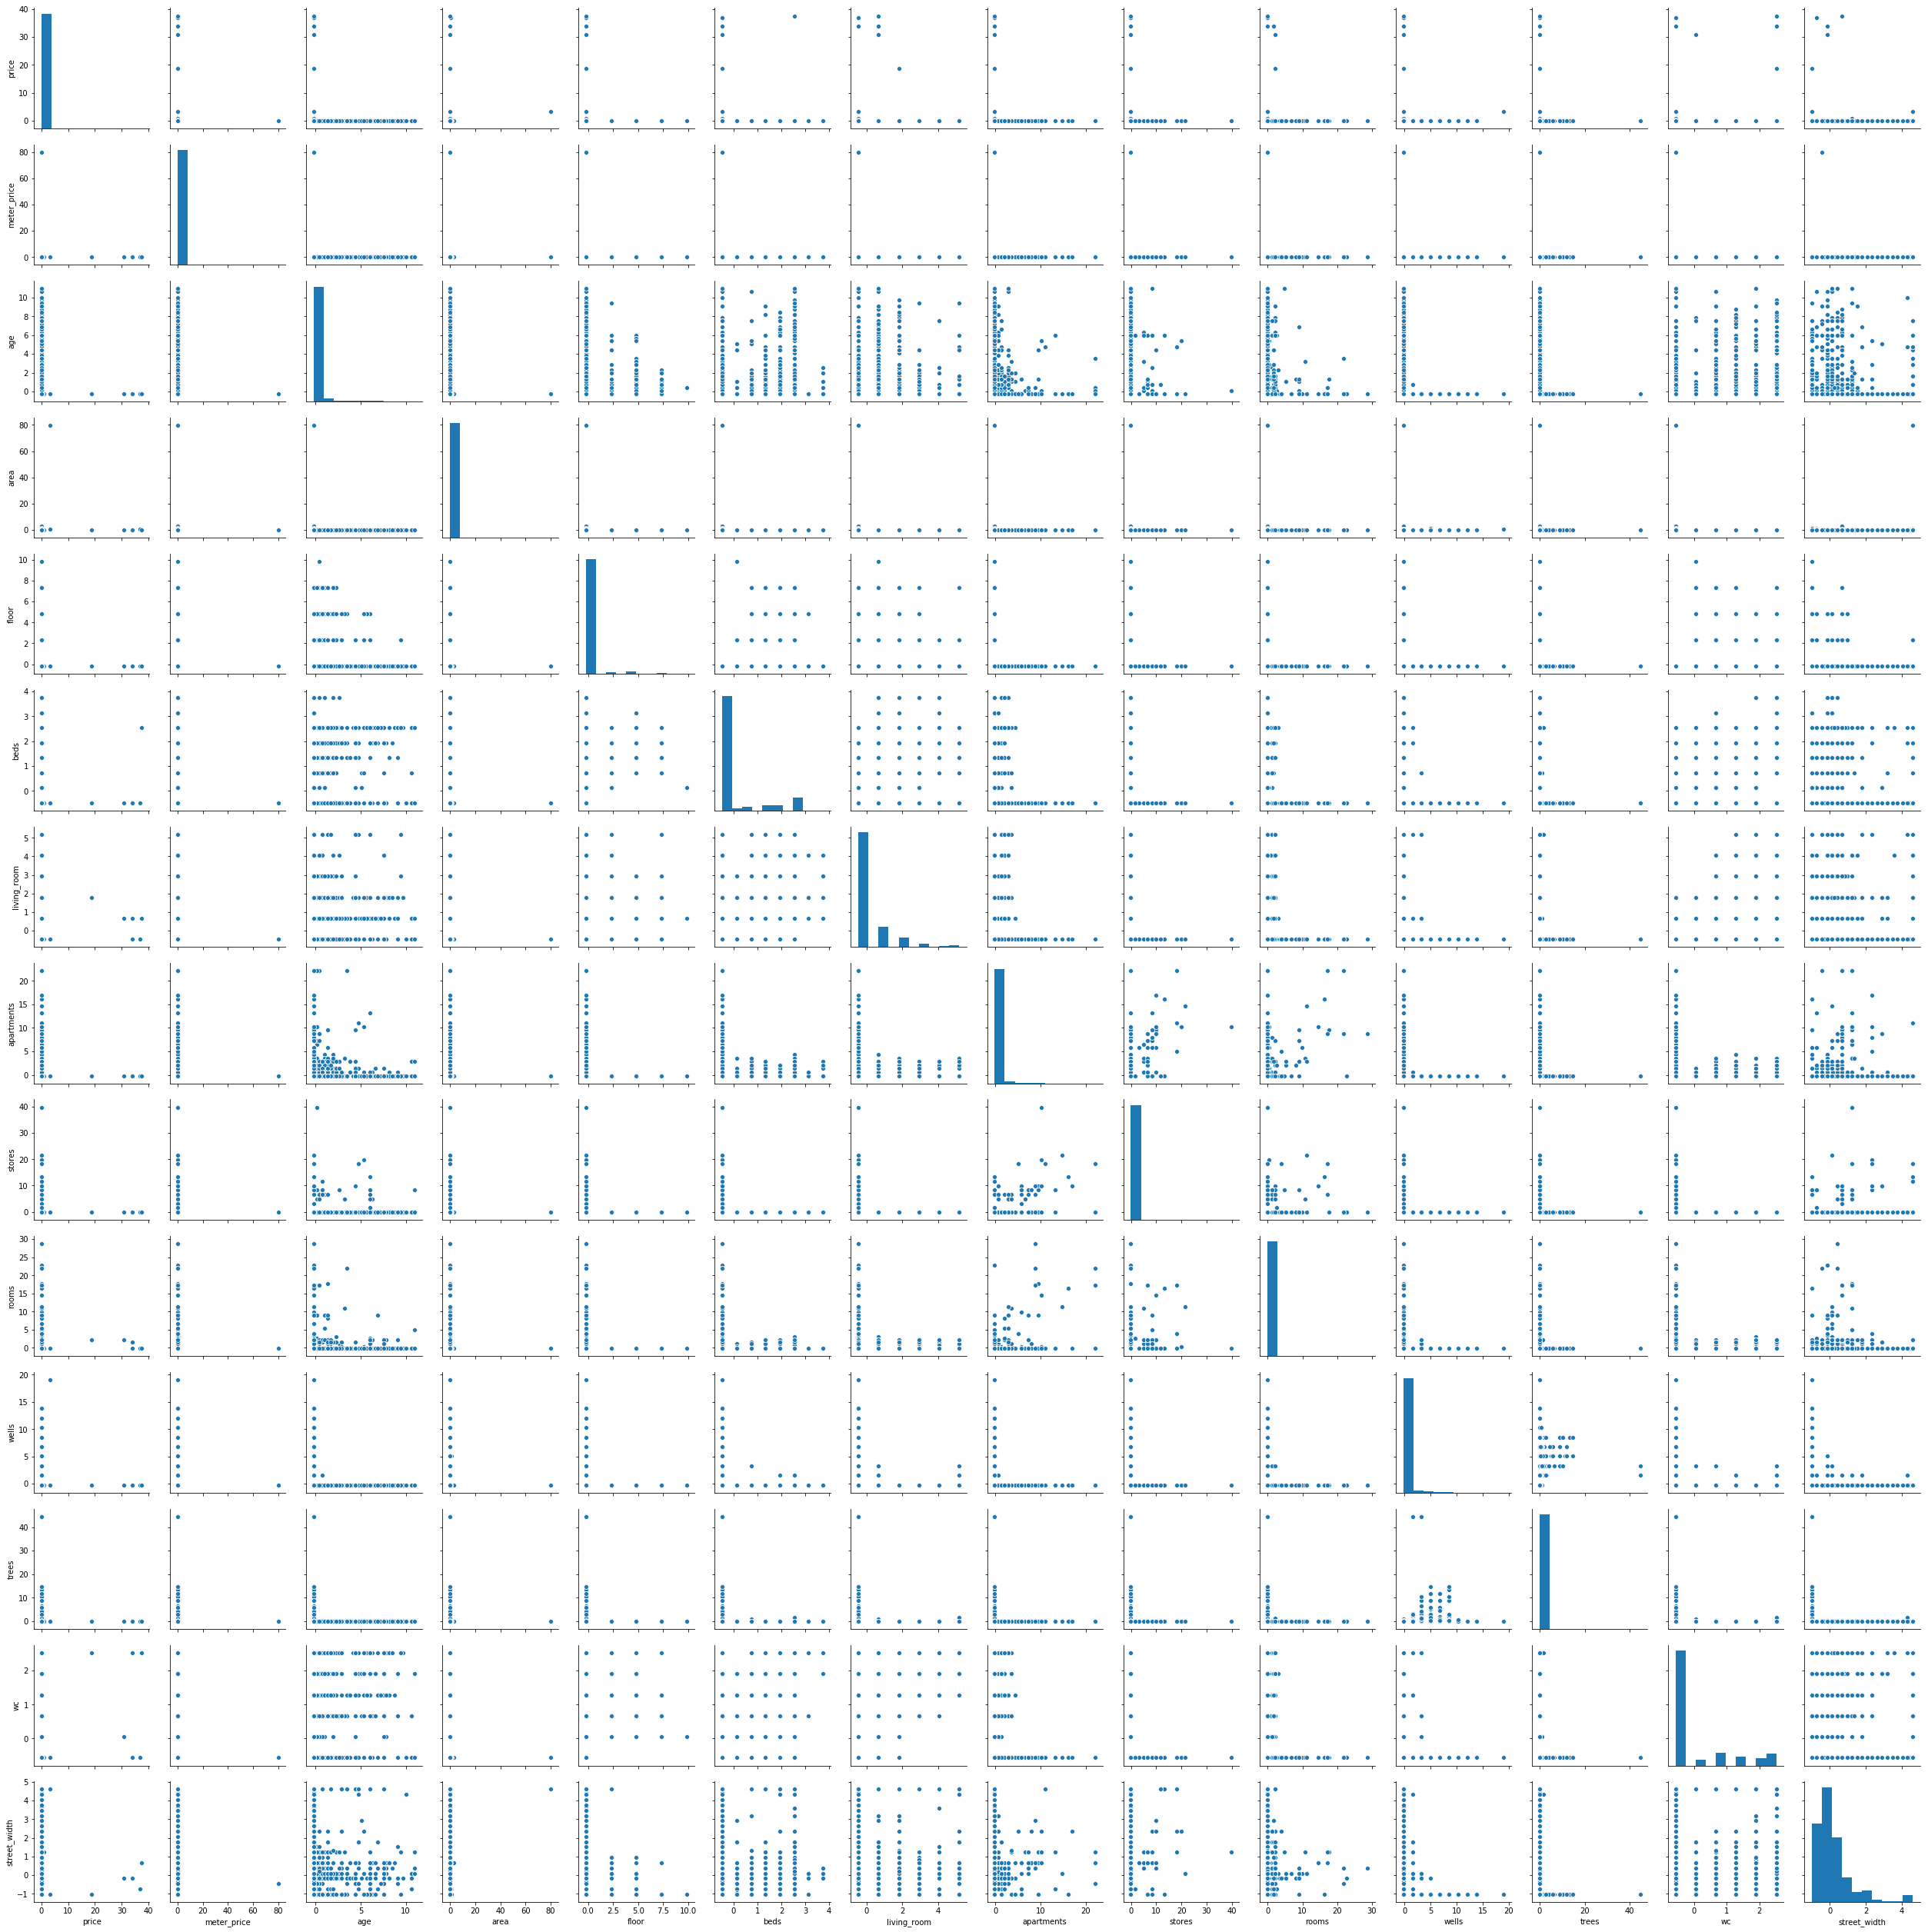

In [12]:
#pairplot of unscaled dataset
sns.pairplot(df_standard)


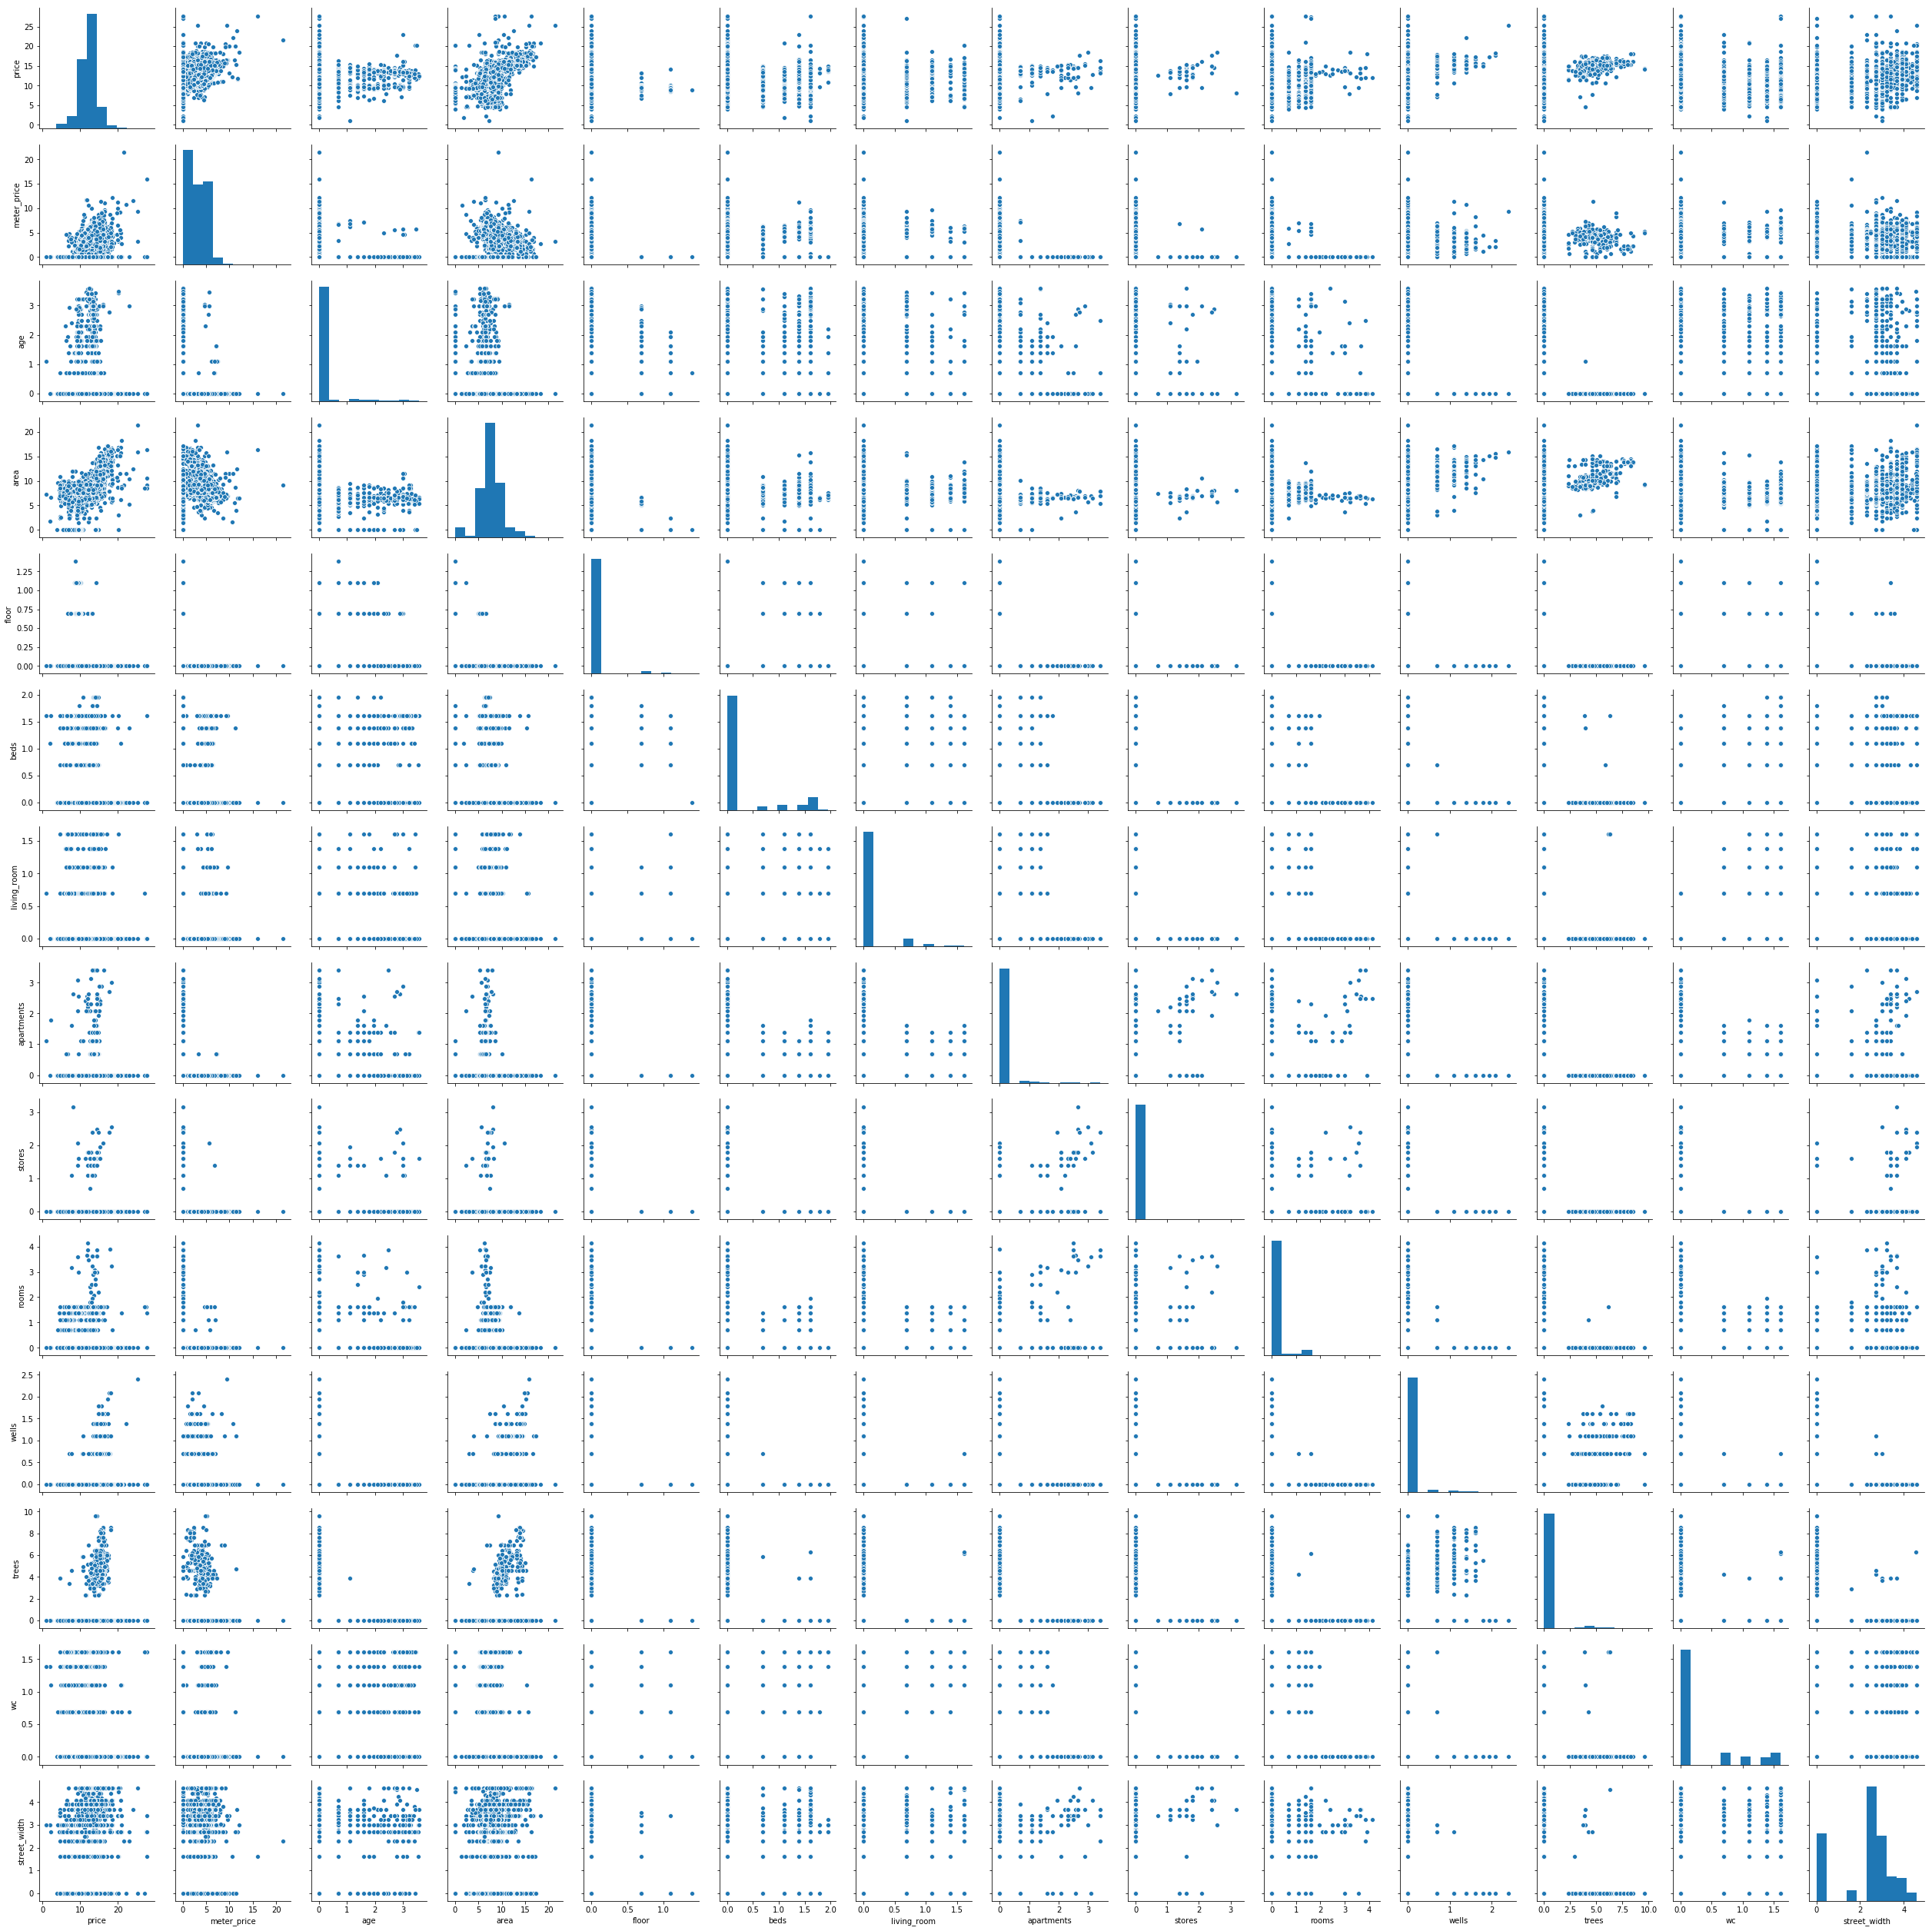

In [13]:
#paiplot of log dataset
sns.pairplot(log_data)


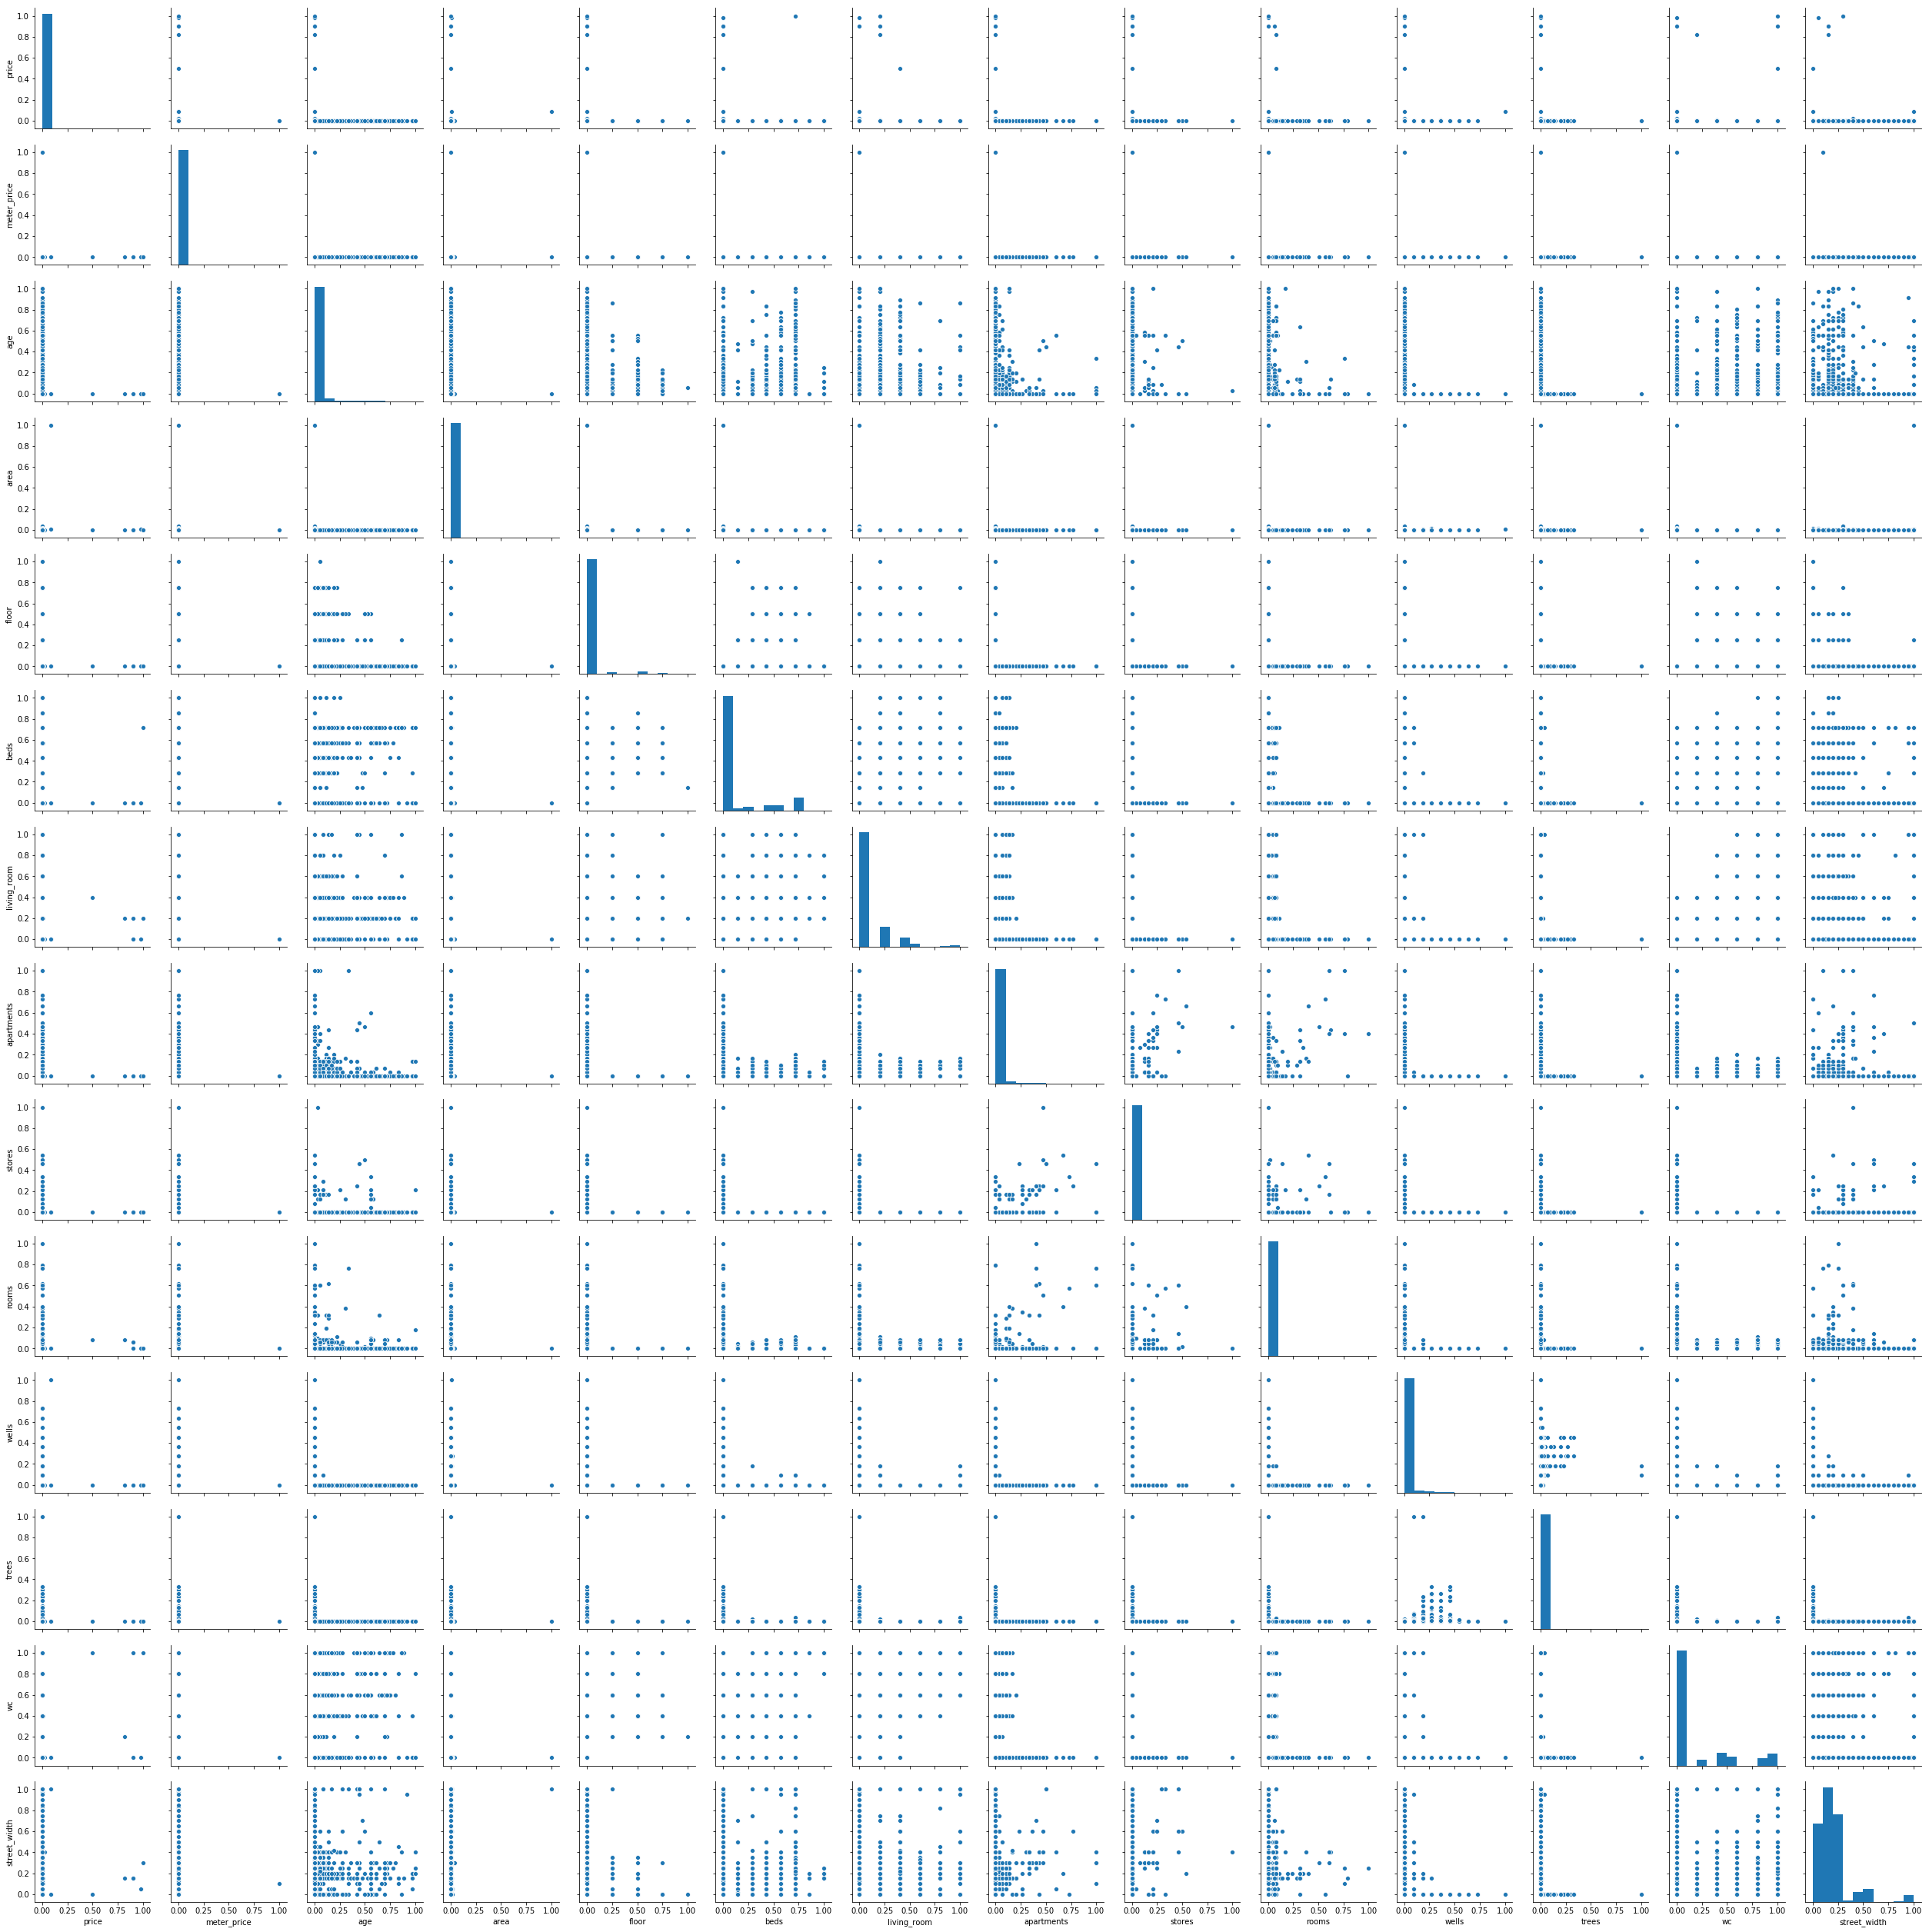

In [14]:
#pairplot of normalized dataset
sns.pairplot(df_normal)

#### Not alot can be deduced from the standardized dataset

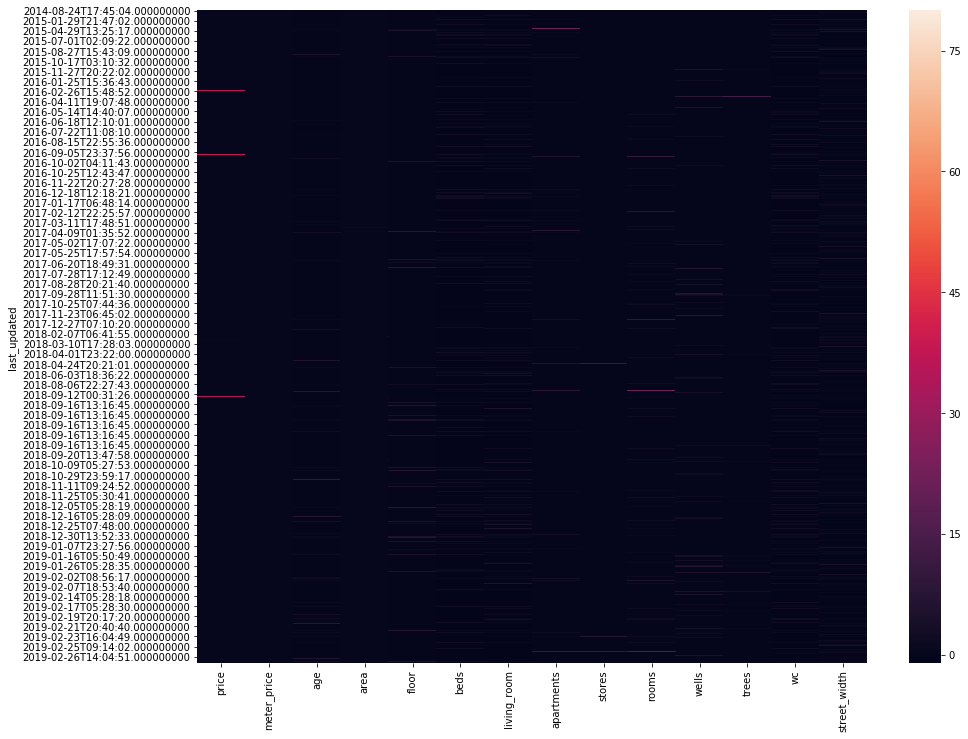

In [15]:
#heat map of standardized dataset
sns.heatmap(df_standard)

#### Here you will find Price and area have very high correlation..The higher the area, the bigger the price. Price also has quite some correlation with meter_price. This is because the bigger the area, the higher the price and hence, the higher the power consumption(thereby increasing the meter reading.)

###### *more is explained further below..

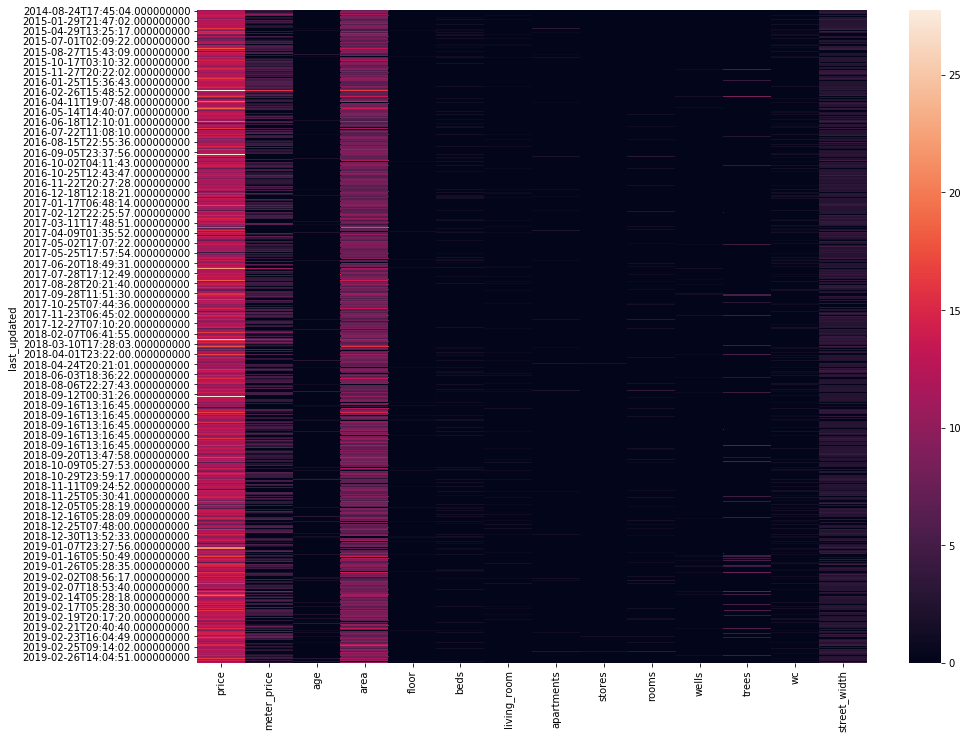

In [16]:
#heatmap of logged dataset
sns.heatmap(log_data)


##### From here you will realize the *age and floor have correlation, *beds and living_room hae high correlation then wc and street_width have high correlation also.

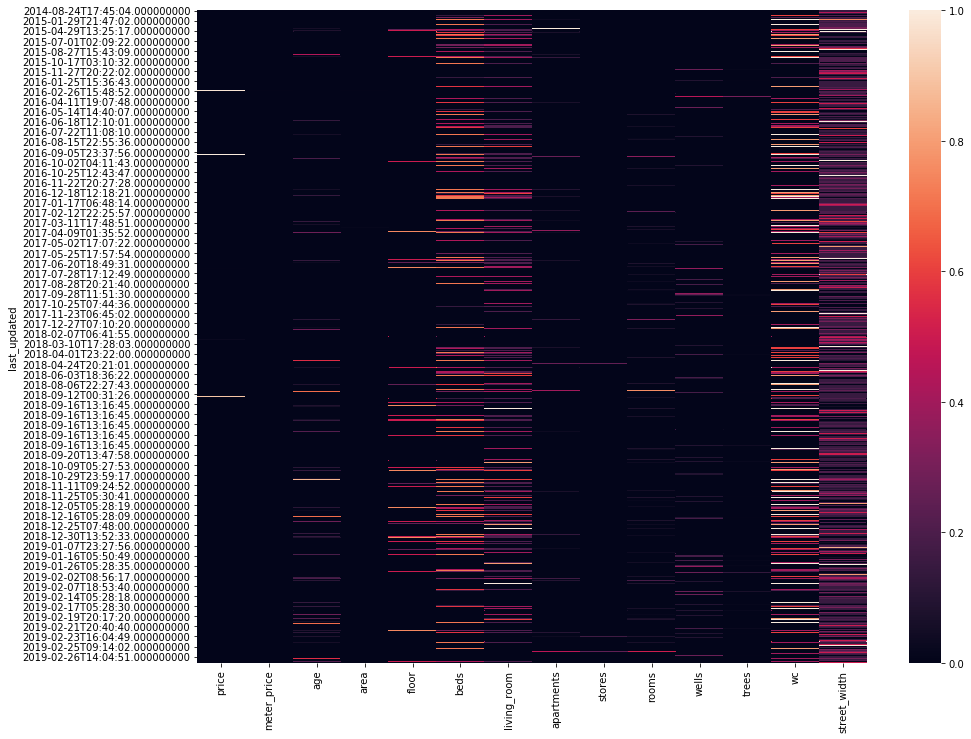

In [17]:
#heatmap of normalized dataset
sns.heatmap(df_normal)

#####  We can find from here what features are highly correlated.
###### * Note that this is ofcourse without the CATEGORICAL VARIABLE whic will be introduced later during analysis phase
######  * The correlation values are very clear in the log_data than in standardized or normalized dataset
#####  --> PRICE has a close but not so high correlation with AREA
#####  --> PRICE also has some correlation with METER PRICE
#####  --> PRICE also has some correlation with WELLS
#####  --> PRICE also has some correlation with TREES
#####  --> PRICE has a much lower correlation with APPARTMENT
#####  --> PRICE has a close but not so high correlation with STREET WIDTH

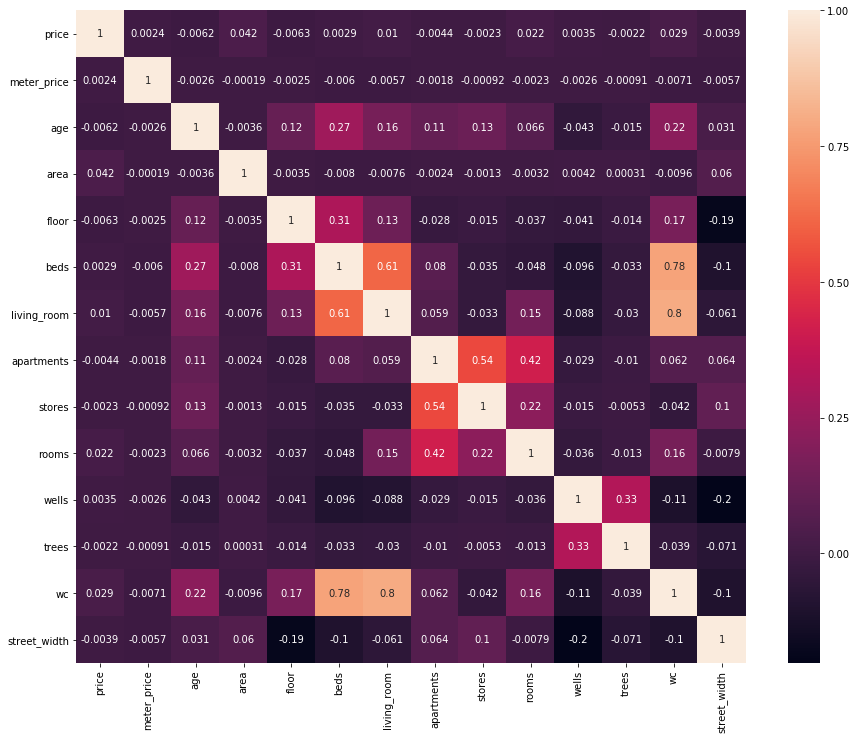

In [18]:
#heatmap of correlation between dataset
sns.heatmap(df_standard.corr(), annot=True);plt.show()

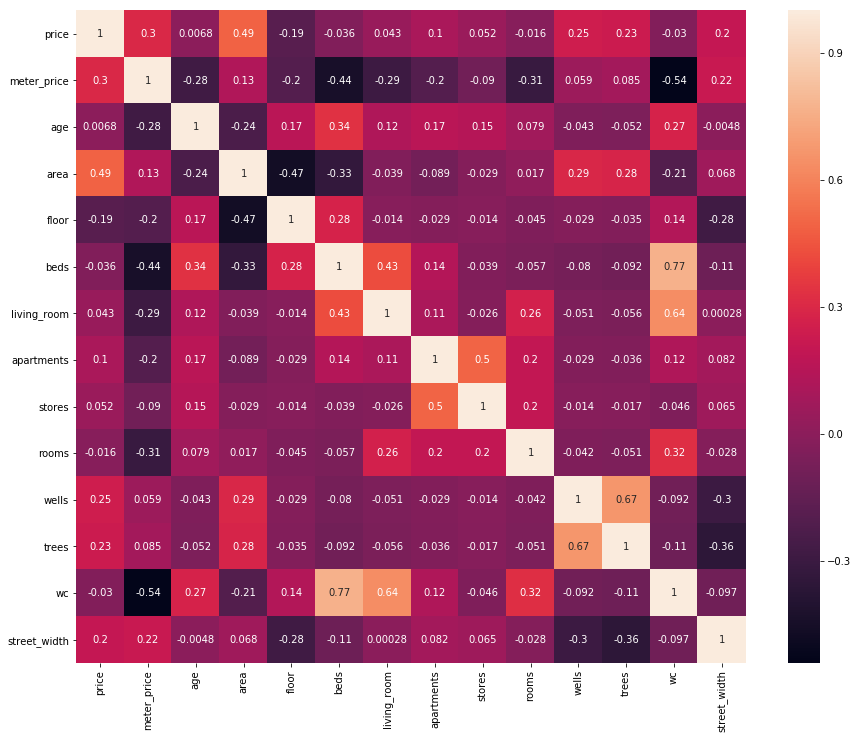

In [19]:
#heatmap of log_data correlation
sns.heatmap(log_data.corr(), annot=True);plt.show()

###### * FLOOR has some correlation with BEDS
###### * APPARTMENT has some correlation with ROOMS
###### * Floor has some correlation with STORES
###### * WC has very HIGH correlation with BEDS
###### * WC has very HIGH correlation with LIVING ROOMS


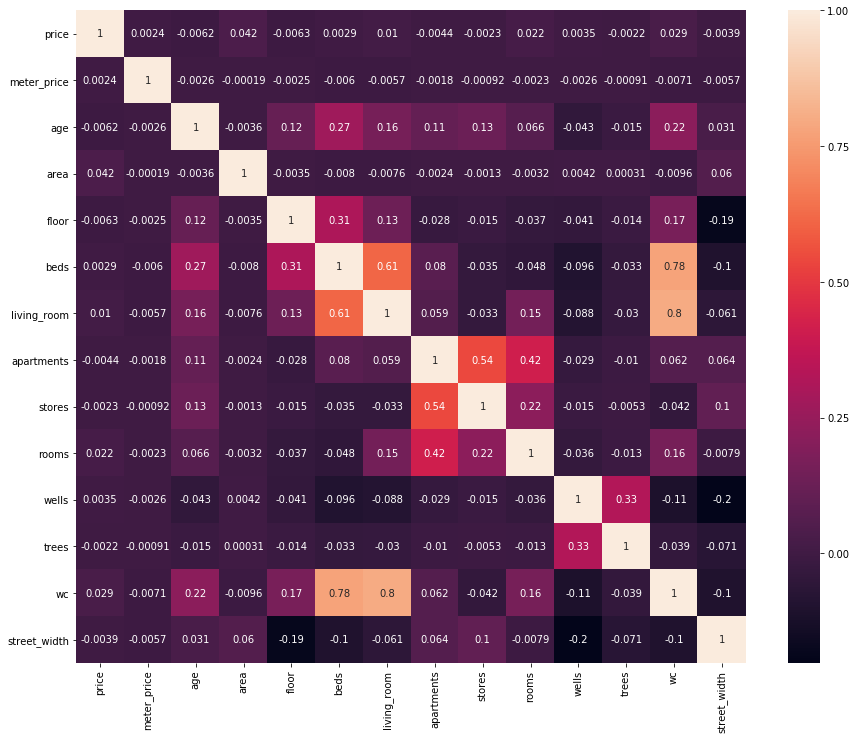

In [20]:
sns.heatmap(df_normal.corr(), annot=True);plt.show()

##### Boxplot shows the presence of outliers in the dataset
###### PRICE AREA AND TREE HAVING THE MOST OUTLIERS

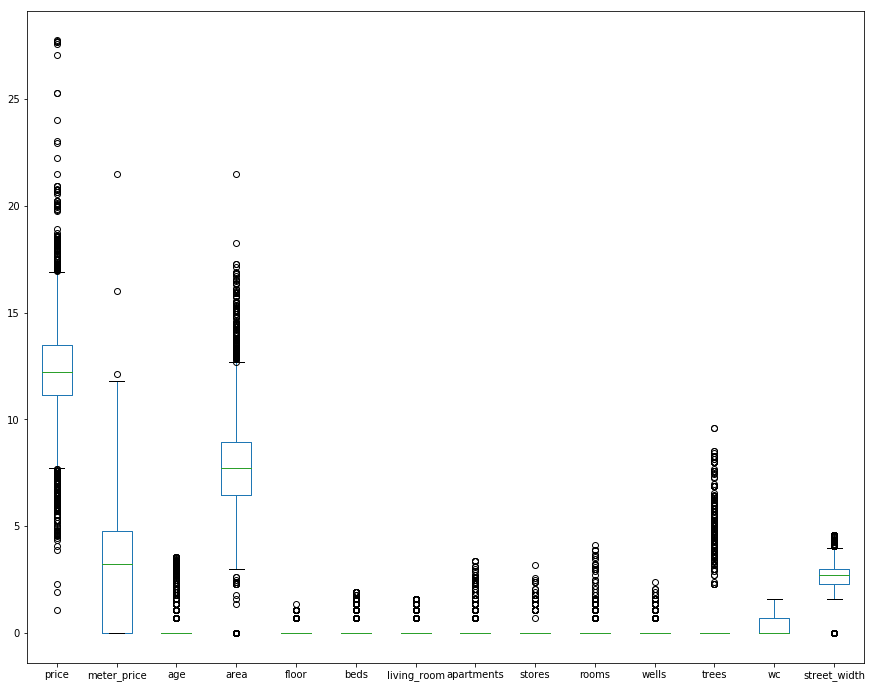

In [21]:
log_data.plot(kind='box')

Text(0.5,1,'Plot of features against price for log_data')

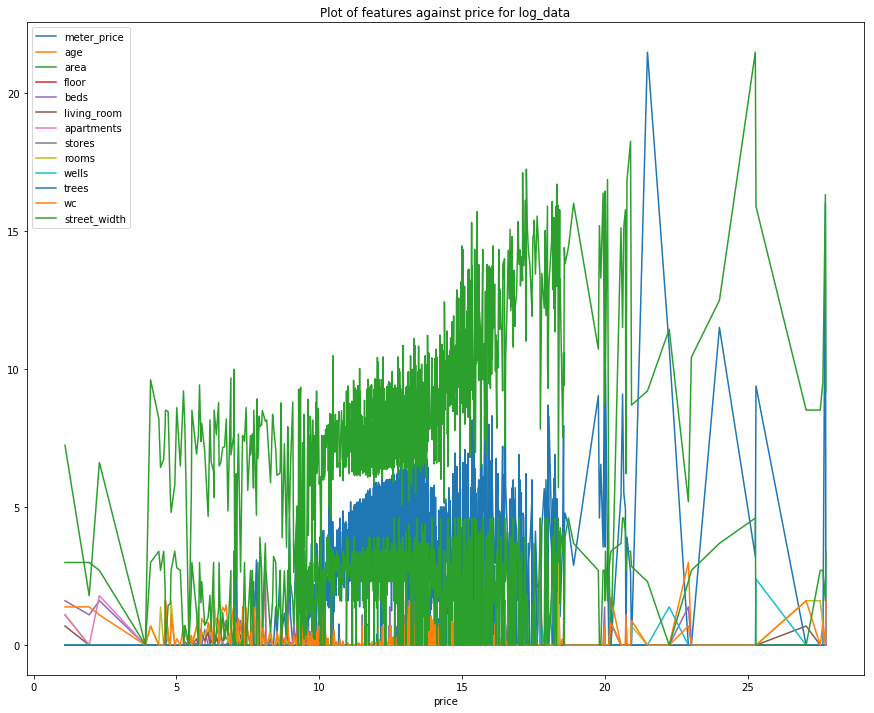

In [22]:
log_data.groupby('price').mean().plot()
plt.title('Plot of features against price for log_data')

Text(0.5,1,'Plot of features against price for standardized data')

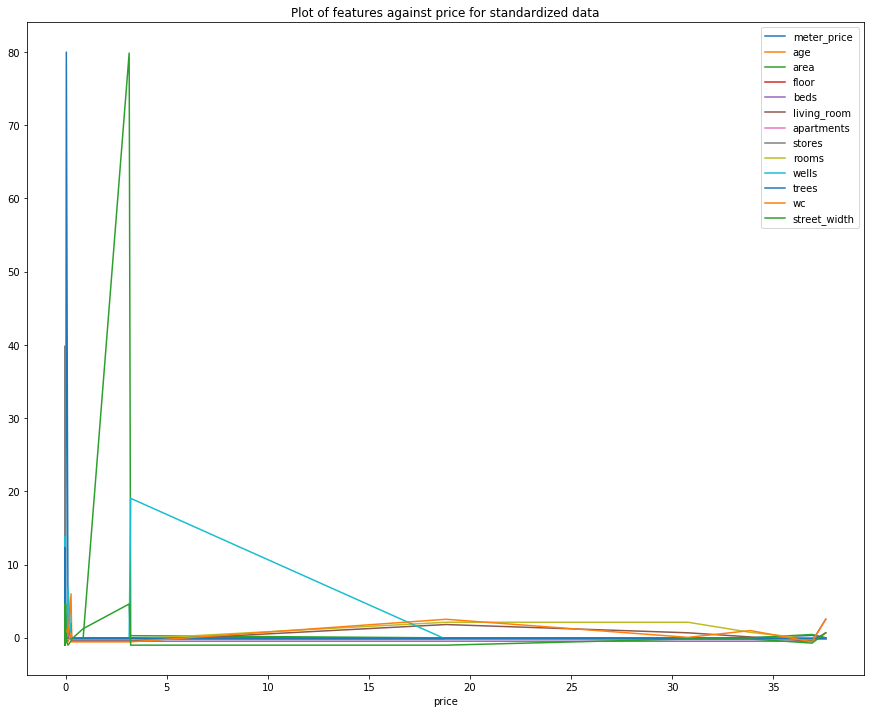

In [23]:
df_standard.groupby('price').mean().plot()
plt.title('Plot of features against price for standardized data')

#### Grouping by ['Type', 'user_type' and 'rent_period']
##### * Grouping by type['Undefined', 'Both', 'Residential']: shows that the mean price is between 1e-9 - 1.5e-9
##### * Grouping by user_type: gives no meaningful insight. meaning the number of agent users and normal user is equal.
##### * Grouping by rent_period: gives no meaningful insight

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EEF42AE48>,
      dtype=object)

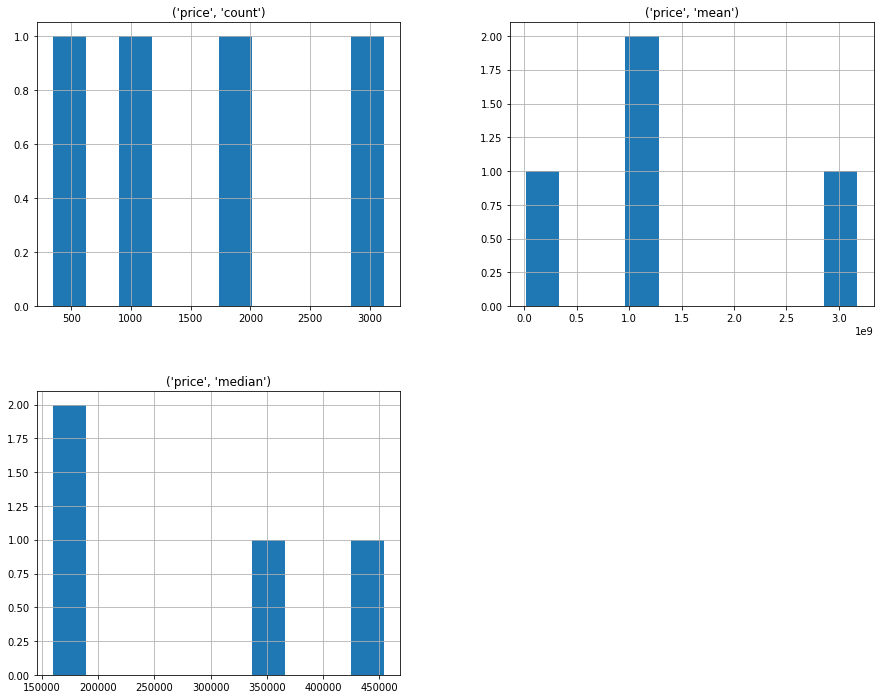

In [24]:
hosue_df.groupby(['type'])[['price']].agg(['mean','median','count']).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EEF5BD0B8>,
      dtype=object)

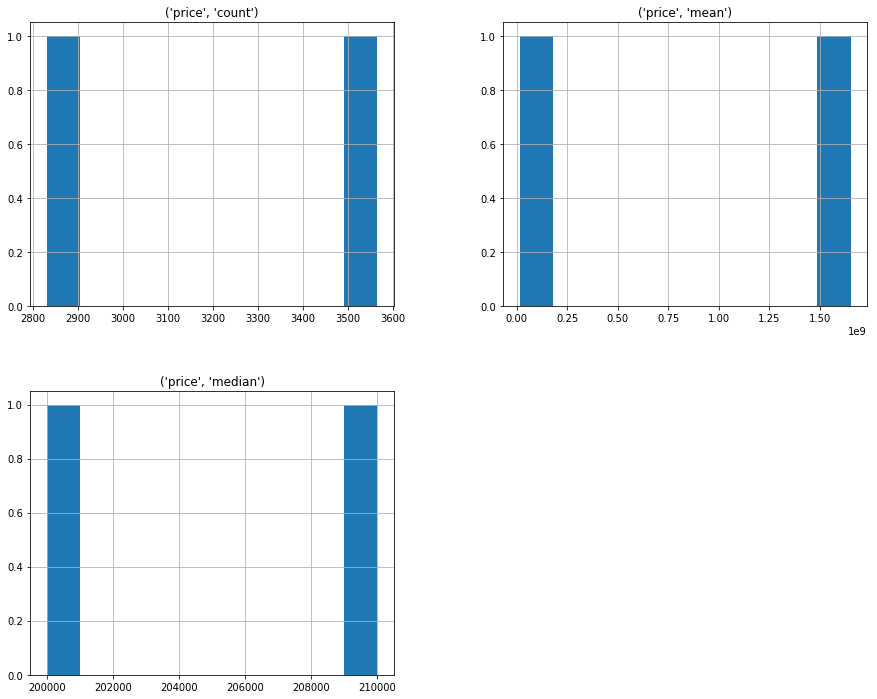

In [25]:
hosue_df.groupby(['user_type'])[['price']].agg(['mean','median','count']).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EEF77D1D0>,
      dtype=object)

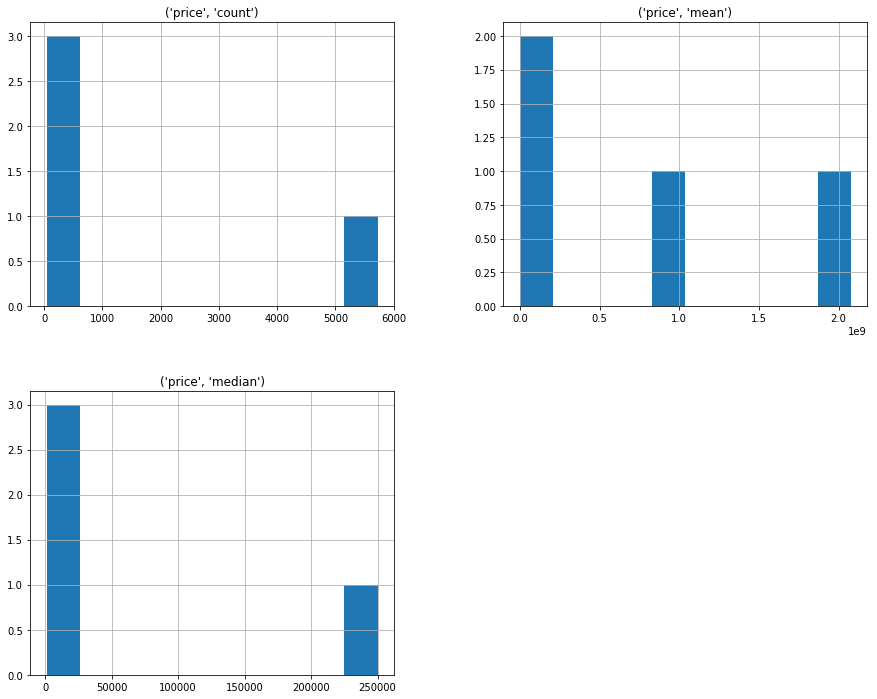

In [26]:
hosue_df.groupby(['rent_period'])[['price']].agg(['mean','median','count']).hist()

###### On 2019-09-16 at about 13:16 there was an unusual behavior in demand for appartment leading to a skyrocketing in price of appartments.
###### This isan unusual behaviour and should be dealt with before modeling the data. Otherwise it would affect the output of our algorithm.

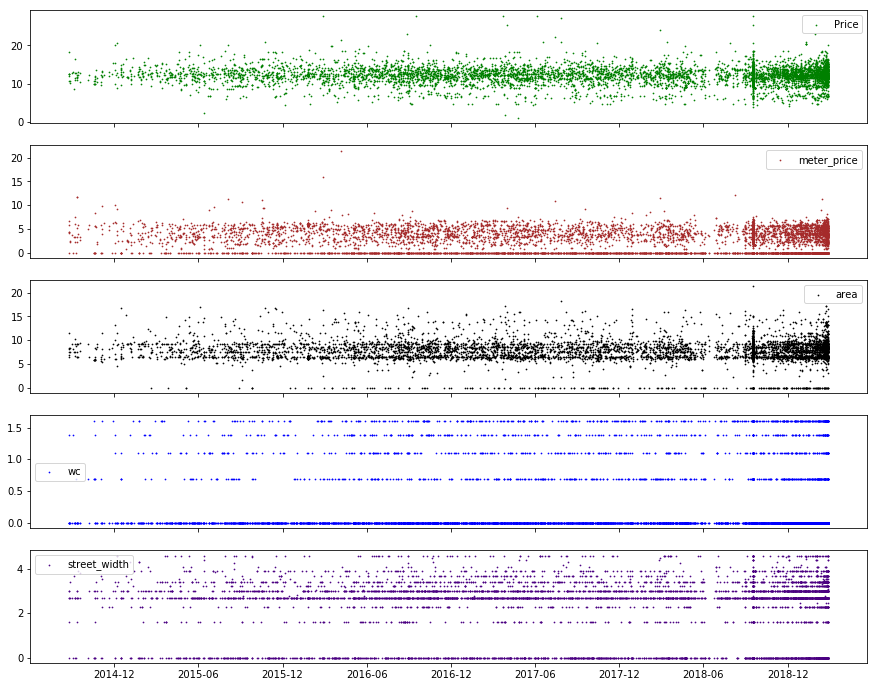

In [27]:
color = ['red', 'green', 'brown', 'black', 'blue', 'indigo']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex= True)
ax1.scatter(log_data.index, log_data.price.values, s = .5, color = color[1], label='Price')
ax1.legend()
ax2.scatter(log_data.index, log_data.meter_price.values, s = .5, color = color[2], label='meter_price')
ax2.legend()
ax3.scatter(log_data.index, log_data.area.values, s = .5, color = color[3], label='area')
ax3.legend()
ax4.scatter(log_data.index, log_data.wc.values, s = .5, color = color[4], label='wc')
ax4.legend()
ax5.scatter(log_data.index, log_data.street_width.values, s = .5, color = color[5], label='street_width')
ax5.legend()

<Figure size 1080x1152 with 0 Axes>

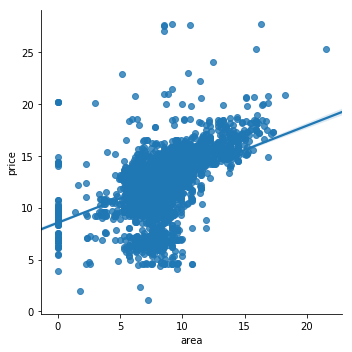

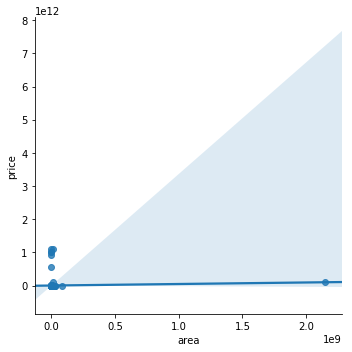

In [28]:
#regression line
plt.figure(figsize=(15,16))
sns.lmplot('area', 'price', log_data)
sns.lmplot('area', 'price', df)

## Handling Outliers

0 price
1 meter_price
2 age
3 area
4 floor
5 beds
6 living_room
7 apartments
8 stores
9 rooms
10 wells
11 trees
12 wc
13 street_width


C:\Users\kennedy\Anaconda3\envs\NeuralNet\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


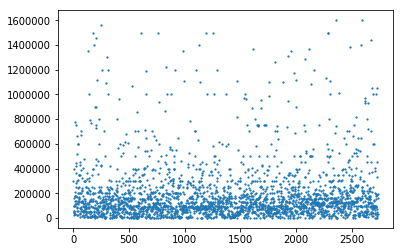

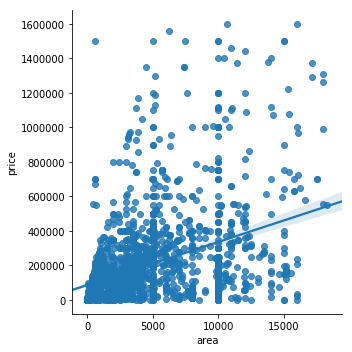

In [3]:
def remove_outliers(df, standardize = None, 
                    logg = None, normalize = None, 
                    lower_quartile = None, upper_quartile = None, multiplier = None):
  
  #drop all objects
  #and leaving all float64 and int64 datatypes
  for ii in hosue_df.columns:
    if hosue_df[ii].dtype == object:
      df = df.drop(ii, axis = 1)
  
  df = df.copy(deep = True)
  quart_1 = df.quantile(lower_quartile)
  quart_2 = df.quantile(upper_quartile)
  diff_quart = quart_2 - quart_1
  df = df[~((df < (quart_1 - 1.5 * diff_quart)) |(df > (quart_2 + 1.5 * diff_quart))).any(axis=1)]
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
  else:
    pass
    
  return df

lower_quart = .25
upper_quart = .75
multiplier = 1.5
df_no_out = remove_outliers(hosue_df, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_standard_no_out = remove_outliers(hosue_df, standardize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
log_data_no_out = remove_outliers(hosue_df, logg=True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_normal_no_out = remove_outliers(hosue_df, normalize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_dummy = pd.get_dummies(hosue_df)

plt.scatter(np.arange(df_no_out.shape[0]), df_no_out.price, s = 1.5)
sns.lmplot('area', 'price', df_no_out)

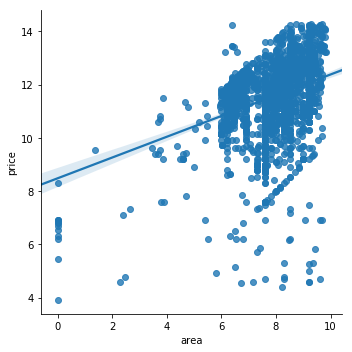

In [30]:
sns.lmplot('area', 'price', log_data_no_out)

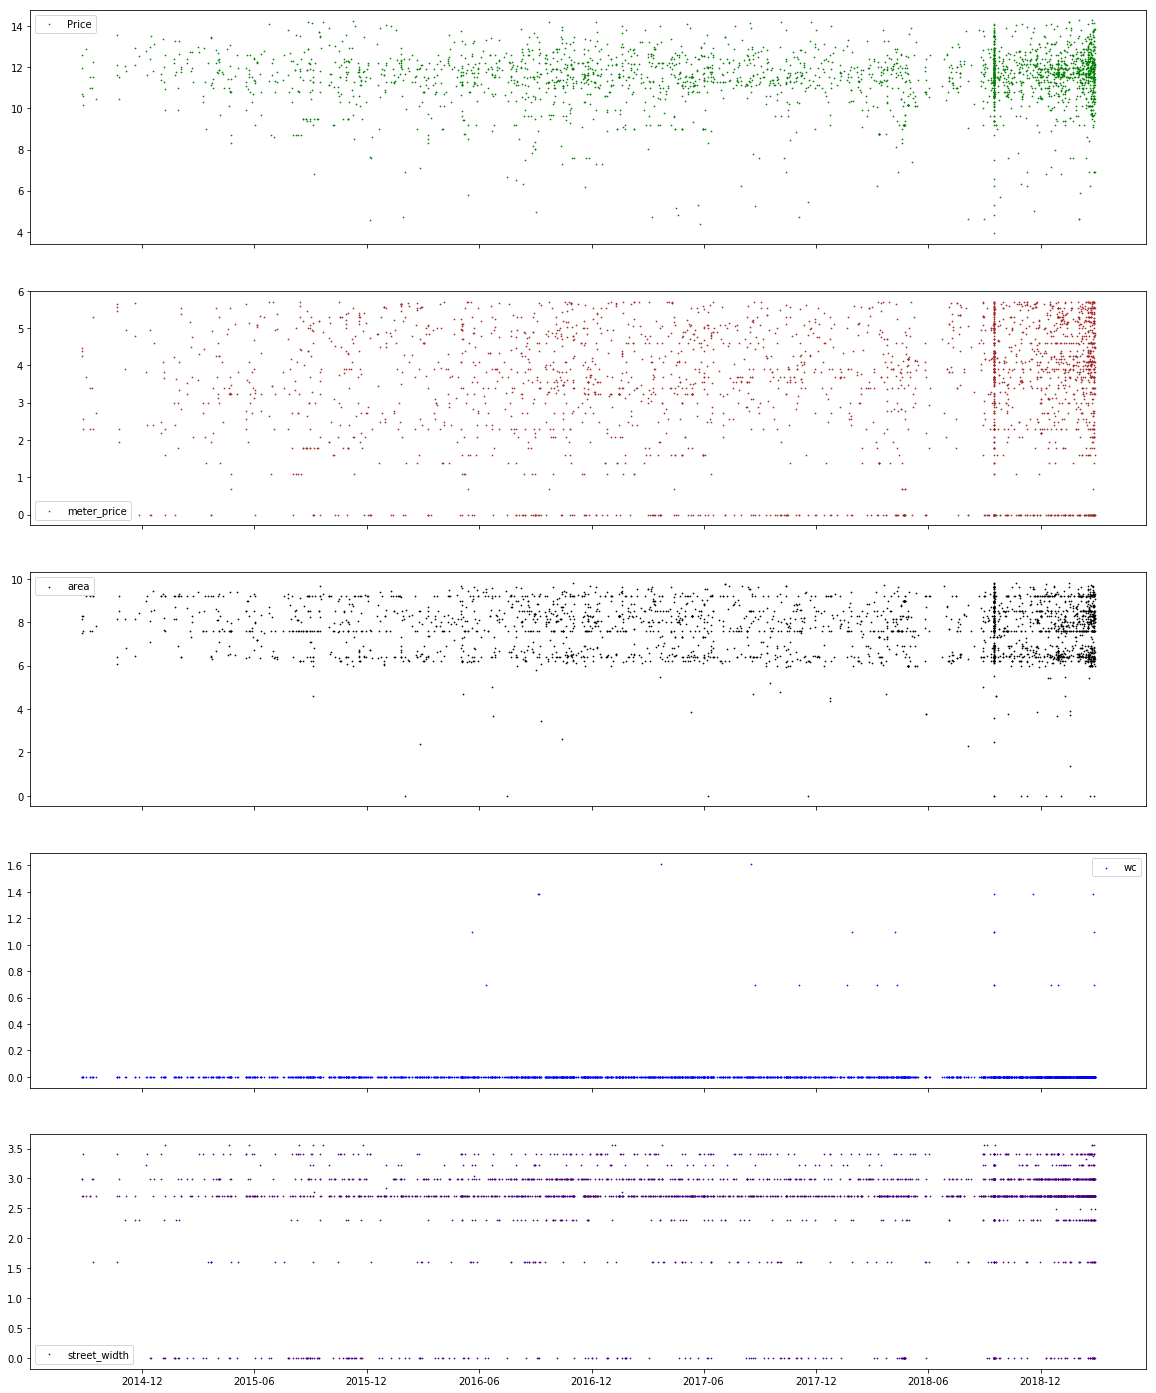

In [31]:
rcParams['figure.figsize'] = 20, 25
color = ['red', 'green', 'brown', 'black', 'blue', 'indigo']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex= True)
ax1.scatter(log_data_no_out.index, log_data_no_out.price.values, s = .5, color = color[1], label='Price')
ax1.legend()
ax2.scatter(log_data_no_out.index, log_data_no_out.meter_price.values, s = .5, color = color[2], label='meter_price')
ax2.legend()
ax3.scatter(log_data_no_out.index, log_data_no_out.area.values, s = .5, color = color[3], label='area')
ax3.legend()
ax4.scatter(log_data_no_out.index, log_data_no_out.wc.values, s = .5, color = color[4], label='wc')
ax4.legend()
ax5.scatter(log_data_no_out.index, log_data_no_out.street_width.values, s = .5, color = color[5], label='street_width')
ax5.legend()


### From here you can see how the outlier function effectively dealt with the data with having to set data.price limits to remove. Compare this two graph

#### The only problem is that more than half of the data was trimmed as outlier. As you can see below.
###### Question! Could this be True? *

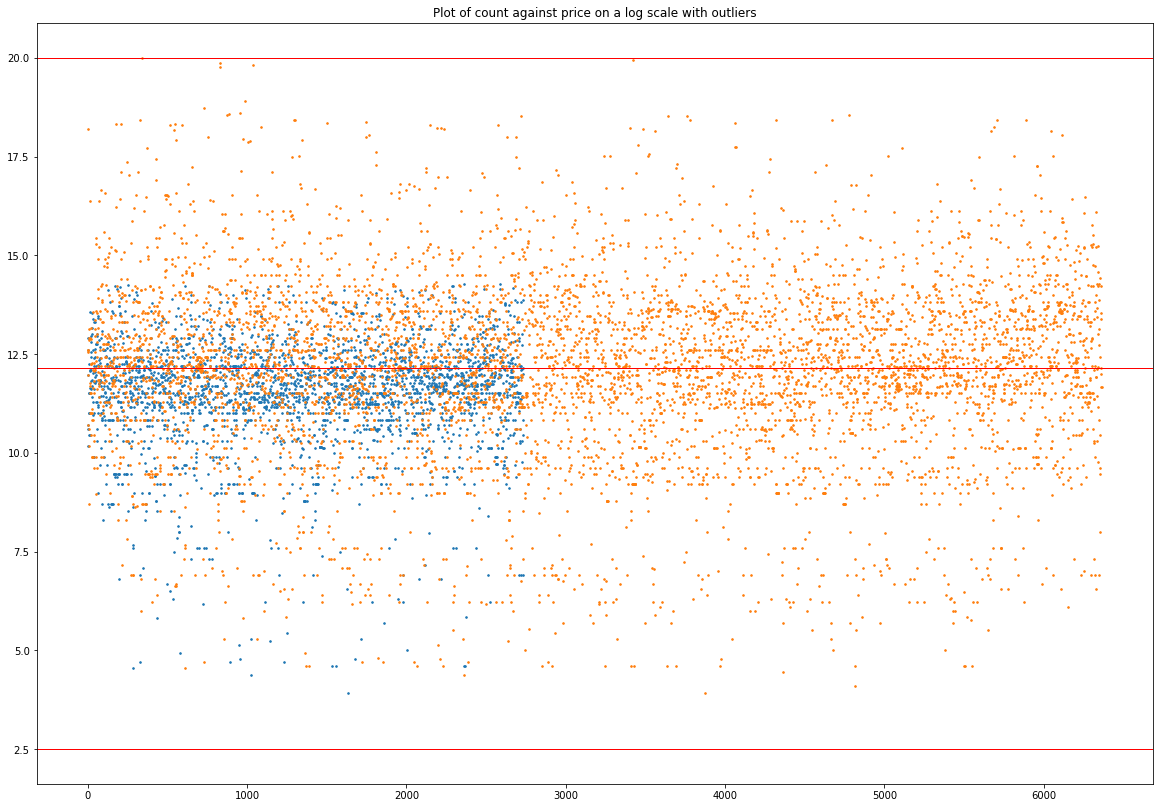

In [32]:
#plot log_price
rcParams['figure.figsize'] = 20, 14
plt.scatter(np.arange(log_data_no_out.shape[0]), log_data_no_out.price, s = 2.5)
plt.title('Plot of count against price on a log scale without outliers')
plt.axhline(y = 20, linewidth=1, color='r')
plt.axhline(y = 2.5, linewidth=1, color='r')
plt.axhline(y = 12.159753818376581, linewidth=1, color='r')

##plot log_price  using price range
plt.scatter(np.arange(after_outl.shape[0]), after_outl.price, s = 2.5)
plt.title('Plot of count against price on a log scale with outliers')
plt.axhline(y = 20, linewidth=1, color='r')
plt.axhline(y = 2.5, linewidth=1, color='r')
plt.axhline(y = 12.159753818376581, linewidth=1, color='r')

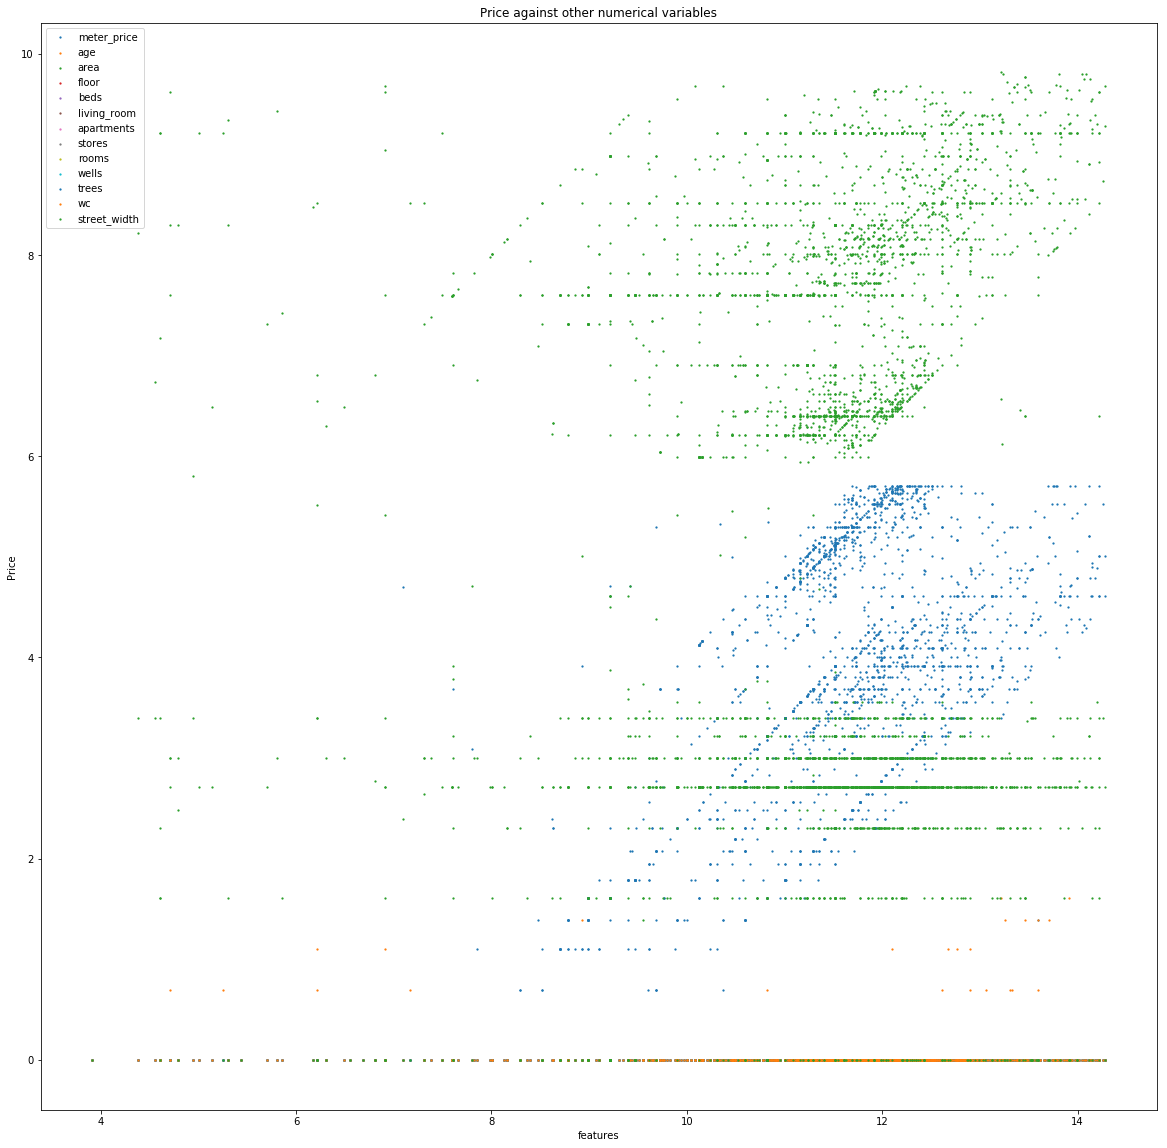

In [33]:
#%% plot price with all other numeric features
rcParams['figure.figsize'] = 20, 20
def plotit(df):
  if 'price' in df.columns:
    for ii in df.columns[1:]:
      plt.scatter(df['price'], df[ii], cmap='Sequential', s = 1.5)
      plt.legend()
      plt.ylabel('Price')
      plt.xlabel('features')
      plt.title('Price against other numerical variables')
      
plotit(log_data_no_out)

###### From here you will find out that it makes sense to have the outliers removed as can be seen above. The chart right down however shows alot of deviation in data begining from around 18 and upwards.

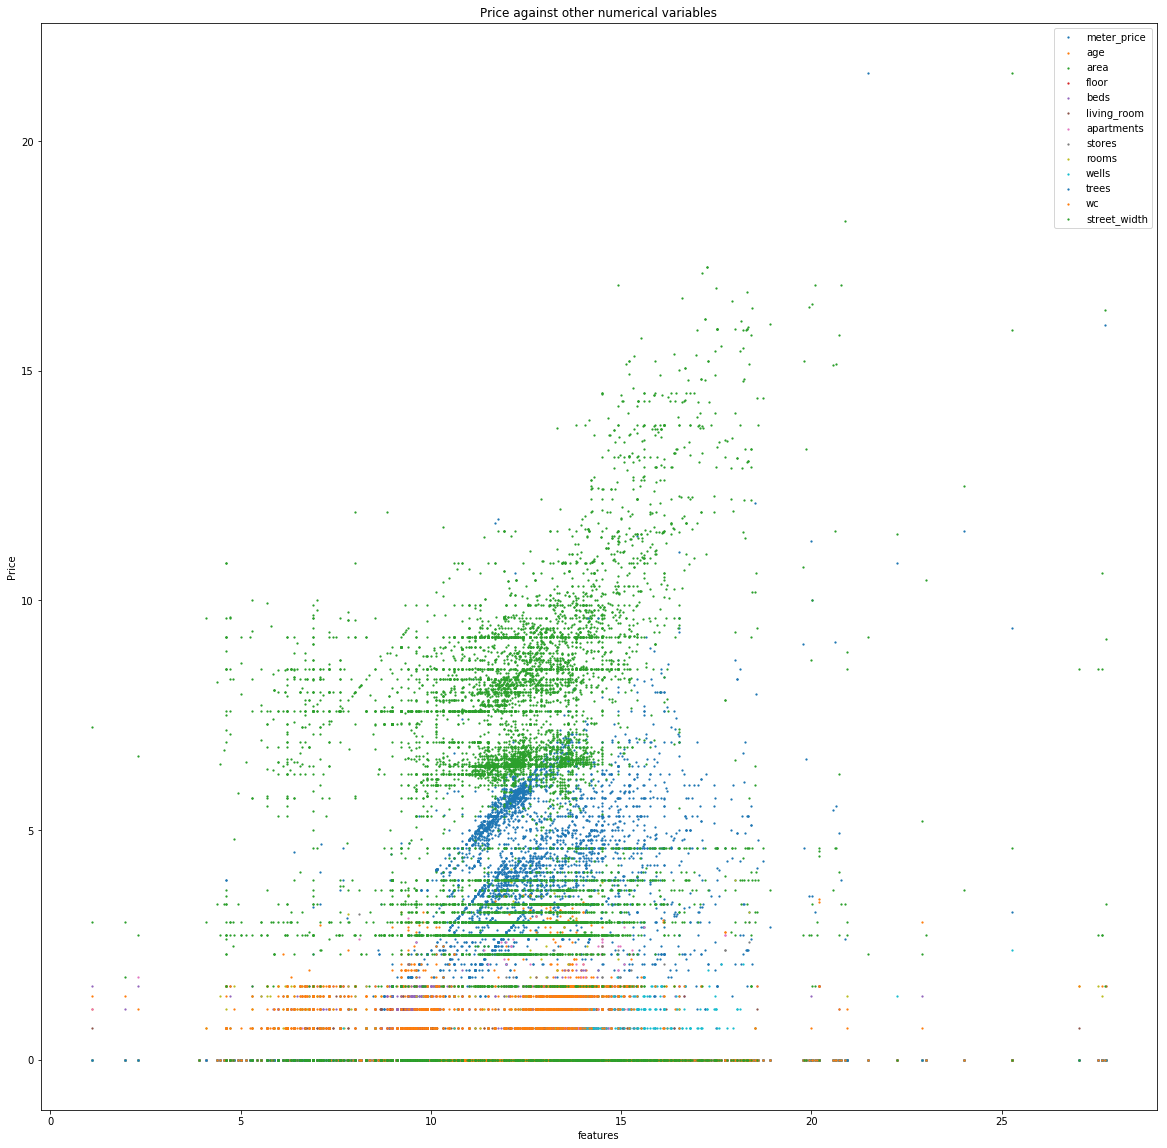

In [34]:
plotit(log_data)

##### Here you will find out in the box plot below that very few outliers remain. You should leave it like this as a bit of noise is ok to make the modle learn anamoly also. We can as well remove the outliers still remaining by increasing the upper percentile below .75. *Not that you will be doing this at the expense of the data(The lower the upper_percentile, the higher the data cut.)

###### *In all we have succeeded in using the quartile strategy to remove most outliers present in the data.

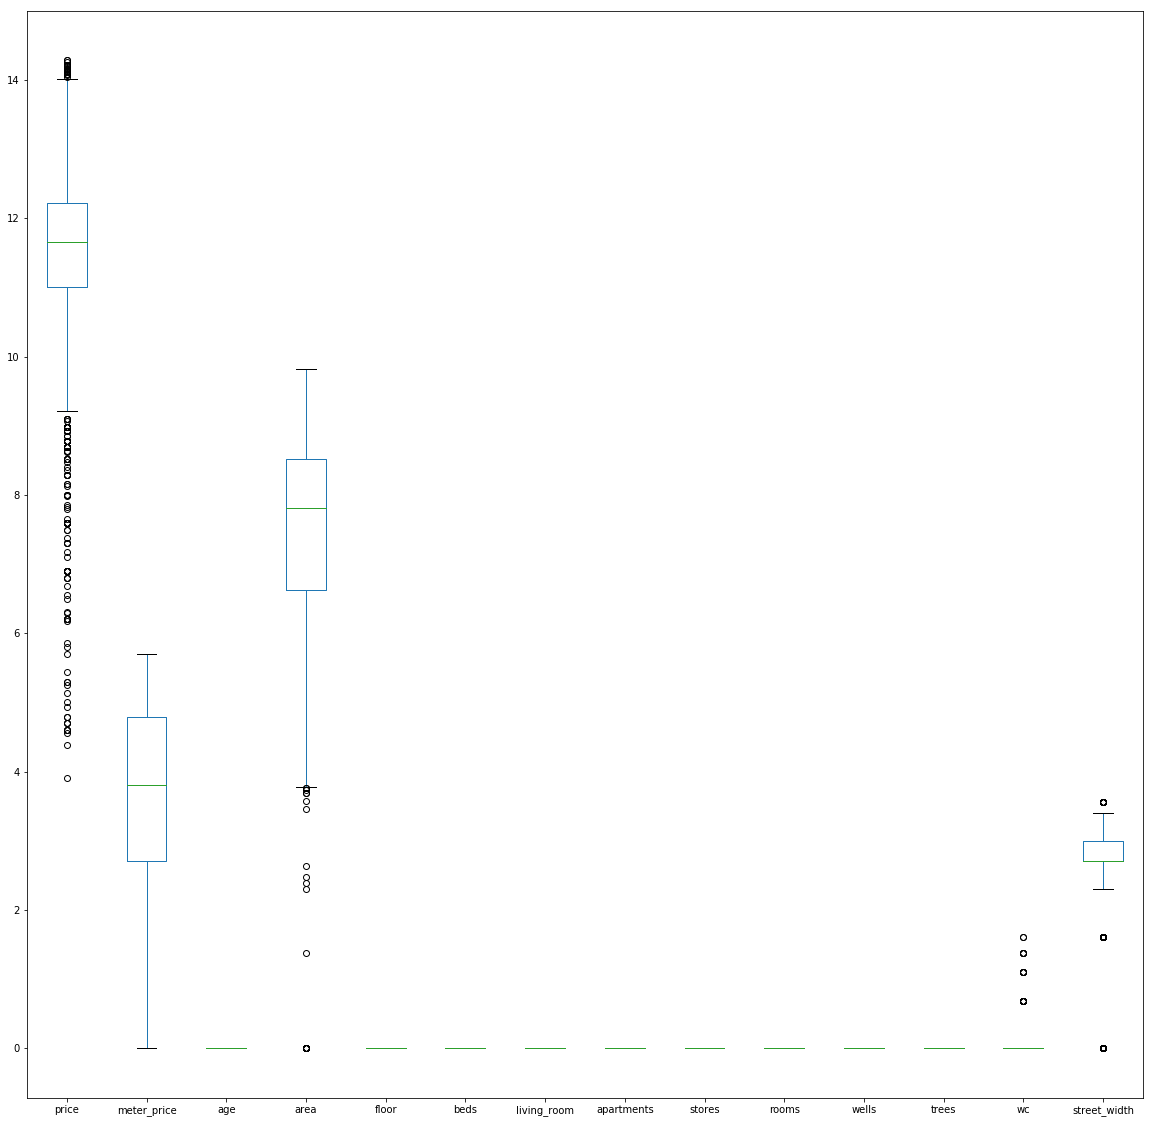

In [35]:
log_data_no_out.plot(kind='box')

In [36]:
df_dummy = pd.get_dummies(hosue_df)

In [37]:
df_dummy.head(10)

price  meter_price  age     area  floor  beds  \
last_updated                                                              
2014-08-24 17:45:04    300000.0           86    0   3500.0      0     0   
2014-08-24 18:39:54  80000000.0          800    0  97623.0      0     0   
2014-08-24 19:15:45    160000.0           80    0   4000.0      0     0   
2014-08-24 21:09:06    300000.0          334    0    900.0      0     0   
2014-08-24 23:58:25    280000.0            0    0    650.0      0     3   
2014-08-25 09:42:00     45000.0           70    0   1800.0      0     0   
2014-08-26 12:01:16     26000.0           13    0   2000.0      0     0   
2014-08-26 19:29:28     40000.0           10    0   4000.0      0     0   
2014-09-01 04:20:04    400000.0           40    0  10000.0      0     0   
2014-09-01 16:23:38    500000.0            0    0   3500.0      0     2   

                     living_room  apartments  stores  rooms  \
last_updated                                                  
2014-08-24 17:45:04            0           0       0      0   
2014-08-24 18:39:54            0           0       0      0   
2014-08-24 19:15:45            0           0       0      0   
2014-08-24 21:09:06            0           0       0      0   
2014-08-24 23:58:25            4           0       0      0   
2014-08-25 09:42:00            0           0       0      0   
2014-08-26 12:01:16            0           0       0      0   
2014-08-26 19:29:28            0           0       0      0   
2014-09-01 04:20:04            0           0       0      0   
2014-09-01 16:23:38            2           0       0      0   

                             ...            street_direction_North  \
last_updated                 ...                                     
2014-08-24 17:45:04          ...                                 0   
2014-08-24 18:39:54          ...                                 0   
2014-08-24 19:15:45          ...                                 0   
2014-08-24 21:09:06          ...                                 0   
2014-08-24 23:58:25          ...                                 1   
2014-08-25 09:42:00          ...                                 1   
2014-08-26 12:01:16          ...                                 0   
2014-08-26 19:29:28          ...                                 0   
2014-09-01 04:20:04          ...                                 0   
2014-09-01 16:23:38          ...                                 0   

                     street_direction_North East  street_direction_North West  \
last_updated                                                                    
2014-08-24 17:45:04                            1                            0   
2014-08-24 18:39:54                            0                            0   
2014-08-24 19:15:45                            0                            0   
2014-08-24 21:09:06                            0                            0   
2014-08-24 23:58:25                            0                            0   
2014-08-25 09:42:00                            0                            0   
2014-08-26 12:01:16                            0                            0   
2014-08-26 19:29:28                            0                            0   
2014-09-01 04:20:04                            0                            0   
2014-09-01 16:23:38                            0                            0   

                     street_direction_South  street_direction_South East  \
last_updated                                                               
2014-08-24 17:45:04                       0                            0   
2014-08-24 18:39:54                       0                            0   
2014-08-24 19:15:45                       0                            0   
2014-08-24 21:09:06                       0                            0   
2014-08-24 23:58:25                       0                            0   
2014-08-25 09:42:00   

#### Here we can find the categorical variables having some interesting correlation with the price. This whill be further revealed perhaps when we are looking for the imortant features during engineering process.

In [38]:
df_dummy.corr()

price  meter_price       age      area  \
price                          1.000000     0.002424 -0.006185  0.041985   
meter_price                    0.002424     1.000000 -0.002618 -0.000189   
age                           -0.006185    -0.002618  1.000000 -0.003581   
area                           0.041985    -0.000189 -0.003581  1.000000   
floor                         -0.006268    -0.002508  0.116998 -0.003457   
beds                           0.002929    -0.005971  0.272666 -0.007997   
living_room                    0.010497    -0.005715  0.163947 -0.007628   
apartments                    -0.004379    -0.001759  0.111944 -0.002420   
stores                        -0.002290    -0.000924  0.128405 -0.001268   
rooms                          0.021814    -0.002315  0.065745 -0.003151   
wells                          0.003502    -0.002598 -0.042935  0.004222   
trees                         -0.002239    -0.000905 -0.014996  0.000308   
wc                             0.028917    -0.007101  0.220282 -0.009597   
street_width                  -0.003863    -0.005682  0.031197  0.060243   
category_Apartment for Rent   -0.006031    -0.002410  0.084150 -0.003322   
category_Apartment for sale   -0.001760    -0.000704  0.011760 -0.000969   
category_Big flat for rent    -0.003154    -0.001273  0.125247 -0.001753   
category_Building for rent    -0.001969    -0.000787  0.063814 -0.001083   
category_Building for sale    -0.003800    -0.001526  0.218735 -0.002098   
category_Farm for sale        -0.008261    -0.004056 -0.067337  0.000221   
category_Land for Sale        -0.021801     0.011327 -0.223832  0.011952   
category_Land for rent         0.031058    -0.001920 -0.031841 -0.002553   
category_Lounge for rent       0.005652    -0.002982 -0.047499 -0.004067   
category_Lounge for sale       0.038719    -0.004542 -0.024163 -0.006095   
category_Office for rent      -0.000681    -0.000272  0.011149 -0.000375   
category_Room for rent        -0.001244    -0.000497  0.018731 -0.000685   
category_Small house for rent -0.001363    -0.000545  0.162251 -0.000750   
category_Small house for sale -0.003157    -0.001432  0.215687 -0.001626   
category_Store for rent       -0.002981    -0.001191  0.063237 -0.001638   
category_Store for sale       -0.001740    -0.000721  0.049864 -0.000992   
...                                 ...          ...       ...       ...   
family_Yes                    -0.005560    -0.002222  0.088859 -0.003063   
family_section_No             -0.031964     0.004293  0.040968  0.005744   
family_section_Yes             0.031964    -0.004293 -0.040968 -0.005744   
type_Both                      0.001688    -0.005439 -0.049445 -0.002646   
type_Commercial                0.018293    -0.003016 -0.029360  0.052369   
type_Residential              -0.019888     0.019375 -0.093727 -0.009924   
type_Undefined                 0.008552    -0.012243  0.135419 -0.012791   
car_entrance_No                0.009183     0.003686 -0.279226  0.004926   
car_entrance_Yes              -0.009183    -0.003686  0.279226 -0.004926   
ac_No                          0.003129     0.001263 -0.095874  0.001741   
ac_Yes                        -0.003129    -0.001263  0.095874 -0.001741   
rent_period_Daily              0.008151     0.059667 -0.031584 -0.003388   
rent_period_Monthly           -0.002587    -0.001034  0.004796 -0.001424   
rent_period_Undefined          0.001139    -0.036445 -0.027395  0.005766   
rent_period_Yearly            -0.007688    -0.003073  0.062198 -0.004216   
extra_unit_No                  0.007334     0.002944 -0.225725  0.003872   
extra_unit_Yes                -0.007334    -0.002944  0.225725 -0.003872   
street_direction_3 Streets     0.025478    -0.002215  0.031785  0.000183   
street_direction_4 Streets    -0.004763    -0.001940 -0.018685  0.001514   
street_direction_East         -0.012405    -0.005173  0.006241 -0.006604   
street_direction_North        -0.014548     0.026542 -0.028404 -0.007042   
street

# Feature Engineering & Selection

#### Here we will use two prominent algorithms to find out we features contribute more the price eveluation/prediction and why.

#### We will use Random Forest and XGBoost  as both have been proven to predict with a very high accuracy the features without parameter tunning.

C:\Users\kennedy\Anaconda3\envs\NeuralNet\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\kennedy\Anaconda3\envs\NeuralNet\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\kennedy\Anaconda3\envs\NeuralNet\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


Text(0.5,1,'Price Against Living room')

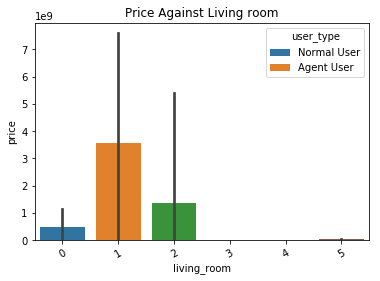

In [5]:
from scipy import stats
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

#plot feature importance
def plot_features():
  fig, ax = plt.subplots(1, 1, figsize = figsize)
  return plot_importance()


def categorical_handler(df, standardize = None, remove_objects = True,
                    logg = None, normalize = None, 
                    lower_quartile = None, upper_quartile = None, multiplier = None):
  
  df_dum = df.copy(deep = True)
  df_num = df.copy(deep = True)
  #seperate numerical variables
  for ii in df_num.columns:
    if df_num[ii].dtypes == object:
      df_num = df_num.drop(ii, axis = 1)
  #seperate categories
  for ii in df_dum.columns:
    if df_dum[ii].dtypes != object:
      df_dum = df_dum.drop(ii, axis = 1)
  #remove outliers
  quart_1 = df_num.quantile(lower_quart)
  quart_2 = df_num.quantile(upper_quart)
  diff_quart = abs(quart_1 - quart_2)
  df_num = df_num[~((df_num < (quart_1 - multiplier * diff_quart)) | (df_num > (quart_2 + multiplier * diff_quart))).any(axis=1)]
  #convert categorical variables to numerical var
  df_dum = pd.get_dummies(df_dum, dtype = float)
  #merge
  df = pd.merge(df_num.reset_index(drop = True),\
             df_dum.reset_index(drop = True), left_index=True, right_index=True)
  
  df.set_index(df_num.index, inplace = True)
  #create additional time features
  
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
      df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
      df = df.replace([np.inf, -np.inf, np.nan], 0)
  else:
    pass
  
  
  return df

lower_quart = .25
upper_quart = .75
multiplier = 1.5
df_no_out = categorical_handler(hosue_df, remove_objects = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_standard_no_out = categorical_handler(hosue_df, remove_objects = True, standardize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
log_data_no_out = categorical_handler(hosue_df, remove_objects = True, logg=True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_normal_no_out = categorical_handler(hosue_df, remove_objects = True, normalize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)

#countplot
pt = sns.countplot(x = 'living_room', data = hosue_df, hue = 'user_type')
plt.xticks(rotation=30)
#barplot
sns.barplot(x="living_room", y = "price", data=hosue_df)
plt.title('Price Against Living room')

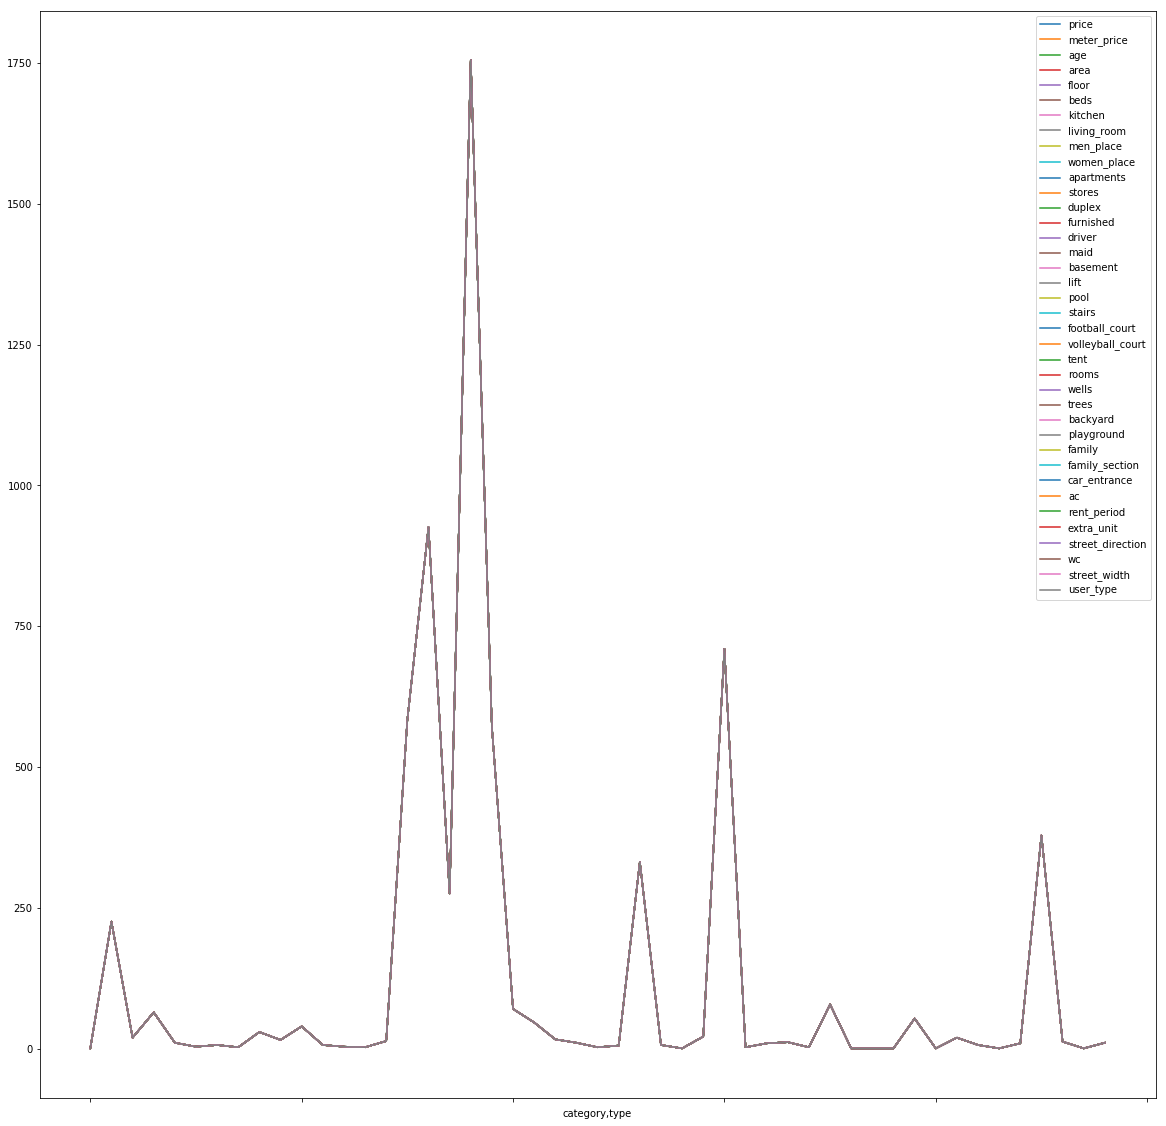

In [41]:
hosue_df.groupby(['category', 'type']).count().plot()

In [7]:
def standize_it(df):
  
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  for ii, ij in enumerate(df.columns):
    df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
    df = df.replace([np.inf, -np.inf, np.nan], 0)
    
  return df

hosue_df_catt = pd.get_dummies(hosue_df)
#standardize dataset
hosue_df_catt_st = standize_it(hosue_df_catt)
hosue_df_catt_st.head(5)

price  meter_price       age      area     floor  \
last_updated                                                               
2014-08-24 17:45:04 -0.031432    -0.012562 -0.208347 -0.017192 -0.199607   
2014-08-24 18:39:54 -0.028730    -0.012535 -0.208347 -0.013696 -0.199607   
2014-08-24 19:15:45 -0.031436    -0.012562 -0.208347 -0.017173 -0.199607   
2014-08-24 21:09:06 -0.031432    -0.012553 -0.208347 -0.017289 -0.199607   
2014-08-24 23:58:25 -0.031432    -0.012565 -0.208347 -0.017298 -0.199607   

                         beds  living_room  apartments   stores    rooms  \
last_updated                                                               
2014-08-24 17:45:04 -0.475361    -0.454944   -0.140033 -0.07358 -0.18426   
2014-08-24 18:39:54 -0.475361    -0.454944   -0.140033 -0.07358 -0.18426   
2014-08-24 19:15:45 -0.475361    -0.454944   -0.140033 -0.07358 -0.18426   
2014-08-24 21:09:06 -0.475361    -0.454944   -0.140033 -0.07358 -0.18426   
2014-08-24 23:58:25  1.331820     4.057110   -0.140033 -0.07358 -0.18426   

                             ...            street_direction_North  \
last_updated                 ...                                     
2014-08-24 17:45:04          ...                         -0.470639   
2014-08-24 18:39:54          ...                         -0.470639   
2014-08-24 19:15:45          ...                         -0.470639   
2014-08-24 21:09:06          ...                         -0.470639   
2014-08-24 23:58:25          ...                          2.124772   

                     street_direction_North East  street_direction_North West  \
last_updated                                                                    
2014-08-24 17:45:04                     4.260598                    -0.200406   
2014-08-24 18:39:54                    -0.234709                    -0.200406   
2014-08-24 19:15:45                    -0.234709                    -0.200406   
2014-08-24 21:09:06                    -0.234709                    -0.200406   
2014-08-24 23:58:25                    -0.234709                    -0.200406   

                     street_direction_South  street_direction_South East  \
last_updated                                                               
2014-08-24 17:45:04               -0.400961                     -0.22985   
2014-08-24 18:39:54               -0.400961                     -0.22985   
2014-08-24 19:15:45               -0.400961                     -0.22985   
2014-08-24 21:09:06               -0.400961                     -0.22985   
2014-08-24 23:58:25               -0.400961                     -0.22985   

                     street_direction_South West  street_direction_Undefined  \
last_updated                                                                   
2014-08-24 17:45:04                    -0.203342                   -0.466918   
2014-08-24 18:39:54                    -0.203342                   -0.466918   
2014-08-24 19:15:45                     4.917829                   -0.466918   
2014-08-24 21:09:06                    -0.203342                   -0.466918   
2014-08-24 23:58:25                    -0.203342                   -0.466918   

                     street_direction_West  user_type_Agent User  \
last_updated                                                       
2014-08-24 17:45:04              -0.372373             -0.891003   
2014-08-24 18:39:54               2.685481             -0.891003   
2014-08-24 19:15:45              -0.372373             -0.891003   
2014-08-24 21:09:06               2.685481             -0.891003   
2014-08-24 23:58:25              -0.372373             -0.891003   

                     user_type_Normal User  
last_updated                                
2014-08-24 17:45:04               0.891003  
2014-08-24 18:39:54               0.891003  
2014-08-24 19:15:45               0.891003  
2014-08-24 21:09:06               0.891003  
2014-08-24 23:58:25               0.891003  

[5 rows x 95

##### You will observe here that of 95 features in the data. Only about 24 of them are relevant to describing or predicting the price.

C:\Users\kennedy\Anaconda3\envs\NeuralNet\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


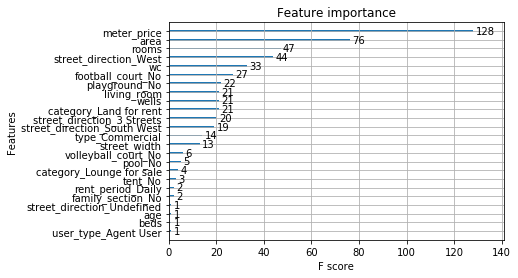

In [8]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}
#call XGBoost Model
model = XGBRegressor()
df_y = hosue_df_catt_st.price
df_X = hosue_df_catt_st.iloc[:, 1:]

#perform Gridsearch on dataset
clf = GridSearchCV(model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(df_y, n_folds=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

model.fit(df_X, df_y)

plot_importance(model)


###### Now we will add some synthetic features to see how this would help in predicting the price


In [44]:
def moving_av(df, n):
  '''
  :params
    :df: feature, can be price, area or any numerical value 
    :n: period we want to check price
  '''
  return pd.DataFrame({'MA_'+str(n): df.rolling(n).mean()})

def expmoving_av(df, n):
  '''
  :params
    :df: feature, can be price, area or any numerical value 
    :n: period we want to check price
  '''
  return pd.DataFrame({'MA_'+str(n): df.ewm(n).mean()})


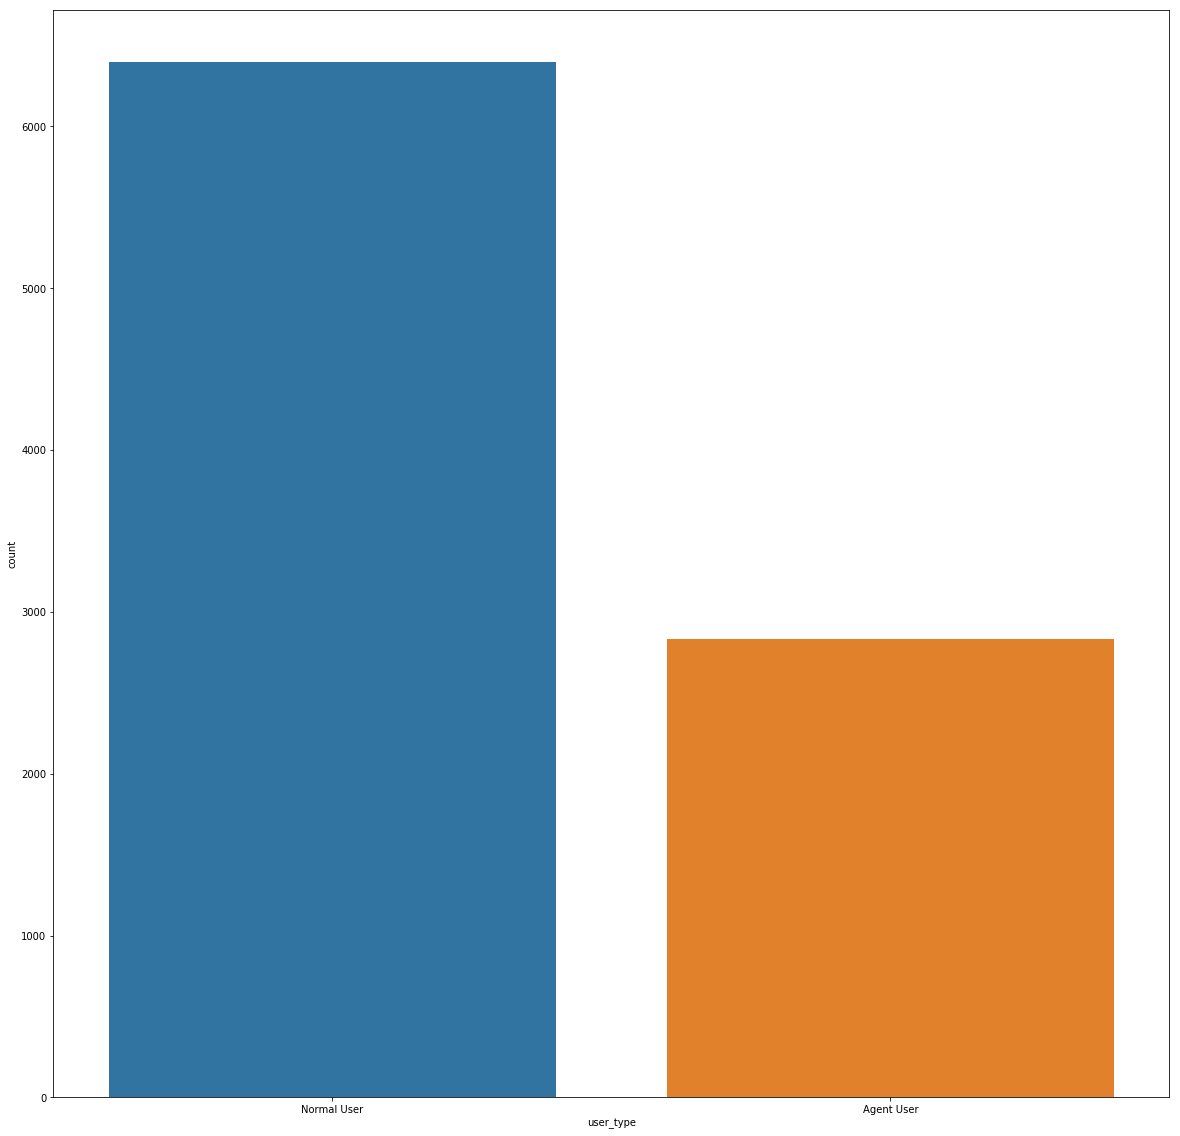

In [45]:
for ii in hosue_df.columns:
  sns.countplot(x = ii, data =hosue_df )